#  Annotation

## Settings 

In [1]:
# Path related settings (these should be the same as for the previous notebook)
output_dir = '/mnt/workspace/jdetlef/ext_ana/processed/'
test = 'all'

# Gene annotation
GTF_PATH = "/mnt/workspace/jdetlef/ext_ana/mus_musculus.104.genes.gtf"
# Cell type annotation
PANGLAO_DB_PATH = "/mnt/workspace/jdetlef/sc-atac-framework/ctannot/panglao_markers"

%load_ext autoreload
%autoreload 2

## Loading packages and setup

In [2]:
import sctoolbox.atac_tree as sub_tree
import sctoolbox.annotation as annot
import sctoolbox.custom_celltype_annotation as ctannot
import episcanpy as epi
import scanpy as sc
from matplotlib import pyplot as plt
from pybiomart import Dataset

## Setup path handling object 

In [3]:
# make an instance of the class
tree = sub_tree.ATAC_tree()
# set processing/output directory
tree.processing_dir = output_dir
# set sample/experiment.. 
tree.run = test

all directories existing
all directories existing


In [4]:
tree.gtf_path = GTF_PATH

## Load anndata

In [5]:
clustering_output = tree.clustering_anndata
adata = epi.read_h5ad(clustering_output)
adata.var

peak_chr peak_start  \
annotated_peaks_0_chr1:3050427-3050801              chr1    3050427   
annotated_peaks_100000_chr4:129518038-129518515     chr4  129518038   
annotated_peaks_100001_chr4:129518849-129519134     chr4  129518849   
annotated_peaks_100002_chr4:129527627-129527883     chr4  129527627   
annotated_peaks_100003_chr4:129533947-129534180     chr4  129533947   
...                                                  ...        ...   
annotated_peaks_99999_chr4:129517580-129517846      chr4  129517580   
annotated_peaks_9999_chr1:192477325-192477572       chr1  192477325   
annotated_peaks_999_chr1:37026210-37026612          chr1   37026210   
annotated_peaks_99_chr1:7849890-7850111             chr1    7849890   
annotated_peaks_9_chr1:3191548-3191937              chr1    3191548   

                                                  peak_end      peak_id  \
annotated_peaks_0_chr1:3050427-3050801             3050801       peak_1   
annotated_peaks_100000_chr4:129518038-129518515  129518515  peak_100001   
annotated_peaks_100001_chr4:129518849-129519134  129519134  peak_100002   
annotated_peaks_100002_chr4:129527627-129527883  129527883  peak_100003   
annotated_peaks_100003_chr4:129533947-129534180  129534180  peak_100004   
...                                                    ...          ...   
annotated_peaks_99999_chr4:129517580-129517846   129517846  peak_100000   
annotated_peaks_9999_chr1:192477325-192477572    192477572   peak_10000   
annotated_peaks_999_chr1:37026210-37026612        37026612    peak_1000   
annotated_peaks_99_chr1:7849890-7850111            7850111     peak_100   
annotated_peaks_9_chr1:3191548-3191937             3191937      peak_10   

                                                peak_score peak_strand  \
annotated_peaks_0_chr1:3050427-3050801                   .           .   
annotated_peaks_100000_chr4:129518038-129518515          .           .   
annotated_peaks_100001_chr4:129518849-129519134          .           .   
annotated_peaks_100002_chr4:129527627-129527883          .           .   
annotated_peaks_100003_chr4:129533947-129534180          .           .   
...                                                    ...         ...   
annotated_peaks_99999_chr4:129517580-129517846           .           .   
annotated_peaks_9999_chr1:192477325-192477572            .           .   
annotated_peaks_999_chr1:37026210-37026612               .           .   
annotated_peaks_99_chr1:7849890-7850111                  .           .   
annotated_peaks_9_chr1:3191548-3191937                   .           .   

                                                feature   gene_start  \
annotated_peaks_0_chr1:3050427-3050801              NaN          NaN   
annotated_peaks_100000_chr4:129518038-129518515    gene  129513066.0   
annotated_peaks_100001_chr4:129518849-129519134    gene  129513066.0   
annotated_peaks_100002_chr4:129527627-129527883    gene  129519870.0   
annotated_peaks_100003_chr4:129533947-129534180    gene  129519870.0   
...                                                 ...          ...   
annotated_peaks_99999_chr4:129517580-129517846     gene  129513066.0   
annotated_peaks_9999_chr1:192477325-192477572      gene  192179018.0   
annotated_peaks_999_chr1:37026210-37026612         gene   37065676.0   
annotated_peaks_99_chr1:7849890-7850111            gene    7799084.0   
annotated_peaks_9_chr1:3191548-3191937             gene    3172238.0   

                                                    gene_end gene_strand  ...  \
annotated_peaks_0_chr1:3050427-3050801                   NaN         NaN  ...   
annotated_peaks_100000_chr4:129518038-129518515  129517740.0           -  ...   
annotated_peaks_100001_chr4:129518849-129519134  129517740.0           -  ...   
annotated_peaks_100002_chr4:129527627-129527883  129534858.0           -  ...   
annotated_peaks_100003_chr4:129533947-129534180  129534858.0           -  ...   
...                                                   

In [6]:
#adata.var.index = adata.var.index.str.replace('_',' ')
    

In [7]:
# FIX FOR THE EXT442
adata.var['peak_chr'] = adata.var['peak_chr'].astype(str)
adata.var['peak_start'] = adata.var['peak_start'].astype(int)
adata.var['peak_end'] = adata.var['peak_end'].astype(int)

In [8]:
adata.var

peak_chr  peak_start  \
annotated_peaks_0_chr1:3050427-3050801              chr1     3050427   
annotated_peaks_100000_chr4:129518038-129518515     chr4   129518038   
annotated_peaks_100001_chr4:129518849-129519134     chr4   129518849   
annotated_peaks_100002_chr4:129527627-129527883     chr4   129527627   
annotated_peaks_100003_chr4:129533947-129534180     chr4   129533947   
...                                                  ...         ...   
annotated_peaks_99999_chr4:129517580-129517846      chr4   129517580   
annotated_peaks_9999_chr1:192477325-192477572       chr1   192477325   
annotated_peaks_999_chr1:37026210-37026612          chr1    37026210   
annotated_peaks_99_chr1:7849890-7850111             chr1     7849890   
annotated_peaks_9_chr1:3191548-3191937              chr1     3191548   

                                                  peak_end      peak_id  \
annotated_peaks_0_chr1:3050427-3050801             3050801       peak_1   
annotated_peaks_100000_chr4:129518038-129518515  129518515  peak_100001   
annotated_peaks_100001_chr4:129518849-129519134  129519134  peak_100002   
annotated_peaks_100002_chr4:129527627-129527883  129527883  peak_100003   
annotated_peaks_100003_chr4:129533947-129534180  129534180  peak_100004   
...                                                    ...          ...   
annotated_peaks_99999_chr4:129517580-129517846   129517846  peak_100000   
annotated_peaks_9999_chr1:192477325-192477572    192477572   peak_10000   
annotated_peaks_999_chr1:37026210-37026612        37026612    peak_1000   
annotated_peaks_99_chr1:7849890-7850111            7850111     peak_100   
annotated_peaks_9_chr1:3191548-3191937             3191937      peak_10   

                                                peak_score peak_strand  \
annotated_peaks_0_chr1:3050427-3050801                   .           .   
annotated_peaks_100000_chr4:129518038-129518515          .           .   
annotated_peaks_100001_chr4:129518849-129519134          .           .   
annotated_peaks_100002_chr4:129527627-129527883          .           .   
annotated_peaks_100003_chr4:129533947-129534180          .           .   
...                                                    ...         ...   
annotated_peaks_99999_chr4:129517580-129517846           .           .   
annotated_peaks_9999_chr1:192477325-192477572            .           .   
annotated_peaks_999_chr1:37026210-37026612               .           .   
annotated_peaks_99_chr1:7849890-7850111                  .           .   
annotated_peaks_9_chr1:3191548-3191937                   .           .   

                                                feature   gene_start  \
annotated_peaks_0_chr1:3050427-3050801              NaN          NaN   
annotated_peaks_100000_chr4:129518038-129518515    gene  129513066.0   
annotated_peaks_100001_chr4:129518849-129519134    gene  129513066.0   
annotated_peaks_100002_chr4:129527627-129527883    gene  129519870.0   
annotated_peaks_100003_chr4:129533947-129534180    gene  129519870.0   
...                                                 ...          ...   
annotated_peaks_99999_chr4:129517580-129517846     gene  129513066.0   
annotated_peaks_9999_chr1:192477325-192477572      gene  192179018.0   
annotated_peaks_999_chr1:37026210-37026612         gene   37065676.0   
annotated_peaks_99_chr1:7849890-7850111            gene    7799084.0   
annotated_peaks_9_chr1:3191548-3191937             gene    3172238.0   

                                                    gene_end gene_strand  ...  \
annotated_peaks_0_chr1:3050427-3050801                   NaN         NaN  ...   
annotated_peaks_100000_chr4:129518038-129518515  129517740.0           -  ...   
annotated_peaks_100001_chr4:129518849-129519134  129517740.0           -  ...   
annotated_peaks_100002_chr4:129527627-129527883  129534858.0           -  ...   
annotated_peaks_100003_chr4:129533947-129534180  129534858.0           -  ...   
...                                       

## Gene annotation 

In [9]:
annot.annotate_adata(adata,
                   GTF_PATH,
                   config=None,
                   best=True,
                   threads=6,
                   coordinate_cols=None,
                   temp_dir="",
                   verbose=True,
                   inplace=True)

Setting up annotation configuration...
Config dictionary: {'queries': [{'distance': [10000, 1000], 'feature_anchor': ['start'], 'feature': ['gene'], 'name': 'promoters'}], 'priority': True, 'show_attributes': ['all'], 'output_by_query': False}
Setting up genomic regions to annotate...
Index(['peak_chr', 'peak_start', 'peak_end'], dtype='object')
Preparing gtf file for annotation...
- Reading gtf with Tabix
- Index of gtf not found - trying to index gtf
- Reading gtf with Tabix
Done preparing gtf!
Annotating regions...
Formatting annotations...
These columns will be overwritten by the annotation
Finished annotation of features! The results are found in the .var table.
[Errno 2] No such file or directory: ''


In [10]:
adata.var['gene_name']

annotated_peaks_0_chr1:3050427-3050801                 NaN
annotated_peaks_100000_chr4:129518038-129518515    Ccdc28b
annotated_peaks_100001_chr4:129518849-129519134    Ccdc28b
annotated_peaks_100002_chr4:129527627-129527883        NaN
annotated_peaks_100003_chr4:129533947-129534180      Txlna
                                                    ...   
annotated_peaks_99999_chr4:129517580-129517846     Ccdc28b
annotated_peaks_9999_chr1:192477325-192477572          NaN
annotated_peaks_999_chr1:37026210-37026612             NaN
annotated_peaks_99_chr1:7849890-7850111                NaN
annotated_peaks_9_chr1:3191548-3191937                 NaN
Name: gene_name, Length: 148517, dtype: category
Categories (25960, object): ['0610006L08Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik', ..., 'mmu-mir-7676-1', 'mmu-mir-7679', 'n-R5s162', 'n-R5s41']

In [11]:
assigned_features = adata.var['gene_name'].dropna()
assigned_features

annotated_peaks_100000_chr4:129518038-129518515    Ccdc28b
annotated_peaks_100001_chr4:129518849-129519134    Ccdc28b
annotated_peaks_100003_chr4:129533947-129534180      Txlna
annotated_peaks_100004_chr4:129534299-129535110      Txlna
annotated_peaks_100005_chr4:129539961-129540183      Txlna
                                                    ...   
annotated_peaks_99995_chr4:129502294-129503161       Eif3i
annotated_peaks_99996_chr4:129503825-129504508       Eif3i
annotated_peaks_99997_chr4:129512576-129513315        Iqcc
annotated_peaks_99998_chr4:129515107-129515508        Iqcc
annotated_peaks_99999_chr4:129517580-129517846     Ccdc28b
Name: gene_name, Length: 44972, dtype: category
Categories (25960, object): ['0610006L08Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik', ..., 'mmu-mir-7676-1', 'mmu-mir-7679', 'n-R5s162', 'n-R5s41']

In [12]:
dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

df = dataset.query(attributes=['ensembl_gene_id', 'external_gene_name'])

In [13]:
ens_dict = dict(zip(df['Gene stable ID'], df['Gene name']))

In [14]:
count = 0
for index, gene in enumerate(assigned_features):
    if gene.startswith("ENSG"):
        if gene in ens_dict.keys():
            if isinstance(ens_dict[gene], str):
                assigned_features.replace(gene, ens_dict[gene], inplace=True)
                count += 1
print(f'{count} ensembl gene ids have been replaced with gene names')

0 ensembl gene ids have been replaced with gene names


In [15]:
assigned_features

annotated_peaks_100000_chr4:129518038-129518515    Ccdc28b
annotated_peaks_100001_chr4:129518849-129519134    Ccdc28b
annotated_peaks_100003_chr4:129533947-129534180      Txlna
annotated_peaks_100004_chr4:129534299-129535110      Txlna
annotated_peaks_100005_chr4:129539961-129540183      Txlna
                                                    ...   
annotated_peaks_99995_chr4:129502294-129503161       Eif3i
annotated_peaks_99996_chr4:129503825-129504508       Eif3i
annotated_peaks_99997_chr4:129512576-129513315        Iqcc
annotated_peaks_99998_chr4:129515107-129515508        Iqcc
annotated_peaks_99999_chr4:129517580-129517846     Ccdc28b
Name: gene_name, Length: 44972, dtype: category
Categories (25960, object): ['0610006L08Rik', '0610009B22Rik', '0610009E02Rik', '0610009L18Rik', ..., 'mmu-mir-7676-1', 'mmu-mir-7679', 'n-R5s162', 'n-R5s41']

In [16]:
assigned_adata = adata[:, assigned_features.index]
assigned_adata

View of AnnData object with n_obs × n_vars = 58173 × 44972
    obs: 'chr1_reads', 'chr10_reads', 'chr11_reads', 'chr12_reads', 'chr13_reads', 'chr14_reads', 'chr15_reads', 'chr16_reads', 'chr17_reads', 'chr18_reads', 'chr19_reads', 'chr2_reads', 'chr3_reads', 'chr4_reads', 'chr5_reads', 'chr6_reads', 'chr7_reads', 'chr8_reads', 'chr9_reads', 'chrM_reads', 'chrX_reads', 'chrY_reads', 'total_genome_reads', 'insertsize_mean', 'Sample', 'id', 'condition', 'date', 'file', 'sample', 'n_features_by_counts', 'log1p_n_features_by_counts', 'total_counts', 'log1p_total_counts', 'insertsize_count', 'mean_insertsize', 'nb_features', 'log_nb_features', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'clustering'
    var: 'peak_chr', 'peak_start', 'peak_end', 'peak_id', 'peak_score', 'peak_strand', 'feature', 'region_length', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', '

In [17]:
peaks_adata = assigned_adata.copy()

## Rank peaks

In [18]:
adata.obs['clustering']


barcode
CCATGATGAATCTGTG-sample1    1
TGTTATCACGCTAGAG-sample1    4
GAACTACTGTATTGCG-sample1    2
TACCGACCTCGAACGA-sample1    4
TGAATGGCTTAGGAGC-sample1    6
                           ..
GACCTATGACCACTTC-sample8    2
AGGTATGCTATTAAGG-sample8    3
AGTAAGTGAAGCGCTC-sample8    2
GCGTCGATGTGTCACA-sample8    4
GTCGGCTGAGTCCCGA-sample8    2
Name: clustering, Length: 58173, dtype: category
Categories (7, object): ['1', '2', '3', '4', '5', '6', '7']

In [19]:
adata.uns

OverloadedDict, wrapping:
	{'Sample_colors': array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f'], dtype=object), 'clustering_colors': array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2'], dtype=object), 'color_set': array(['red', 'blue', 'green', 'pink', 'chartreuse', 'gray', 'yellow',
       'brown', 'purple', 'orange', 'wheat', 'lightseagreen', 'cyan',
       'khaki', 'cornflowerblue', 'olive', 'gainsboro', 'darkmagenta',
       'slategray', 'ivory', 'darkorchid', 'papayawhip', 'paleturquoise',
       'oldlace', 'orangered', 'lavenderblush', 'gold', 'seagreen',
       'deepskyblue', 'lavender', 'peru', 'silver', 'midnightblue',
       'antiquewhite', 'blanchedalmond', 'firebrick', 'greenyellow',
       'thistle', 'powderblue', 'darkseagreen', 'darkolivegreen',
       'moccasin', 'olivedrab', 'mediumseagreen', 'lightgray',
       'darkgreen', 'tan', 'yellowgreen', 'peachpuff', 'cornsilk',
       'd

In [20]:
peaks_adata.uns['log1p']['base'] = None

In [21]:
# TODO save ALL clustering resolutions in infoprocess!
# Workaround:
resolutions = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']

In [22]:
for res in resolutions:
    print(f'Ranking peaks for leiden clusters with resolution: {res}')
    epi.tl.rank_features(peaks_adata, f'leiden_{res}', omic='ATAC', 
                         key_added=f'rank_features_groups_{res}', n_features=100, use_raw=False)
    
print('Done')

Ranking peaks for leiden clusters with resolution: 0.1
Ranking peaks for leiden clusters with resolution: 0.2
Ranking peaks for leiden clusters with resolution: 0.3
Ranking peaks for leiden clusters with resolution: 0.4
Ranking peaks for leiden clusters with resolution: 0.5
Ranking peaks for leiden clusters with resolution: 0.6
Ranking peaks for leiden clusters with resolution: 0.7
Ranking peaks for leiden clusters with resolution: 0.8
Ranking peaks for leiden clusters with resolution: 0.9
Done


## Rank genes
Replace peaks with gene names

In [23]:
genes_adata = peaks_adata.copy()
genes_adata.var.reset_index(inplace=True)  # remove peaks from index and save them in the column ['index']
genes_adata.var.set_index('gene_name',inplace=True)  # set genes as index
genes_adata.var.index = genes_adata.var.index.astype('str')  # to avoid index being categorical
genes_adata.var_names_make_unique(join='_')
genes_adata.raw = genes_adata

In [24]:
for res in resolutions:
    print(f'Ranking genes groups for leiden clusters with resolution: {res}')
    sc.tl.rank_genes_groups(genes_adata, groupby=f'leiden_{res}', use_raw=False, key_added=f'rank_genes_groups_{res}')

print('Done')

Ranking genes groups for leiden clusters with resolution: 0.1
Ranking genes groups for leiden clusters with resolution: 0.2
Ranking genes groups for leiden clusters with resolution: 0.3
Ranking genes groups for leiden clusters with resolution: 0.4
Ranking genes groups for leiden clusters with resolution: 0.5
Ranking genes groups for leiden clusters with resolution: 0.6
Ranking genes groups for leiden clusters with resolution: 0.7
Ranking genes groups for leiden clusters with resolution: 0.8
Ranking genes groups for leiden clusters with resolution: 0.9


Done


### Plot ranked genes

Plotting ranked genes groups for leiden with resolution: 0.1


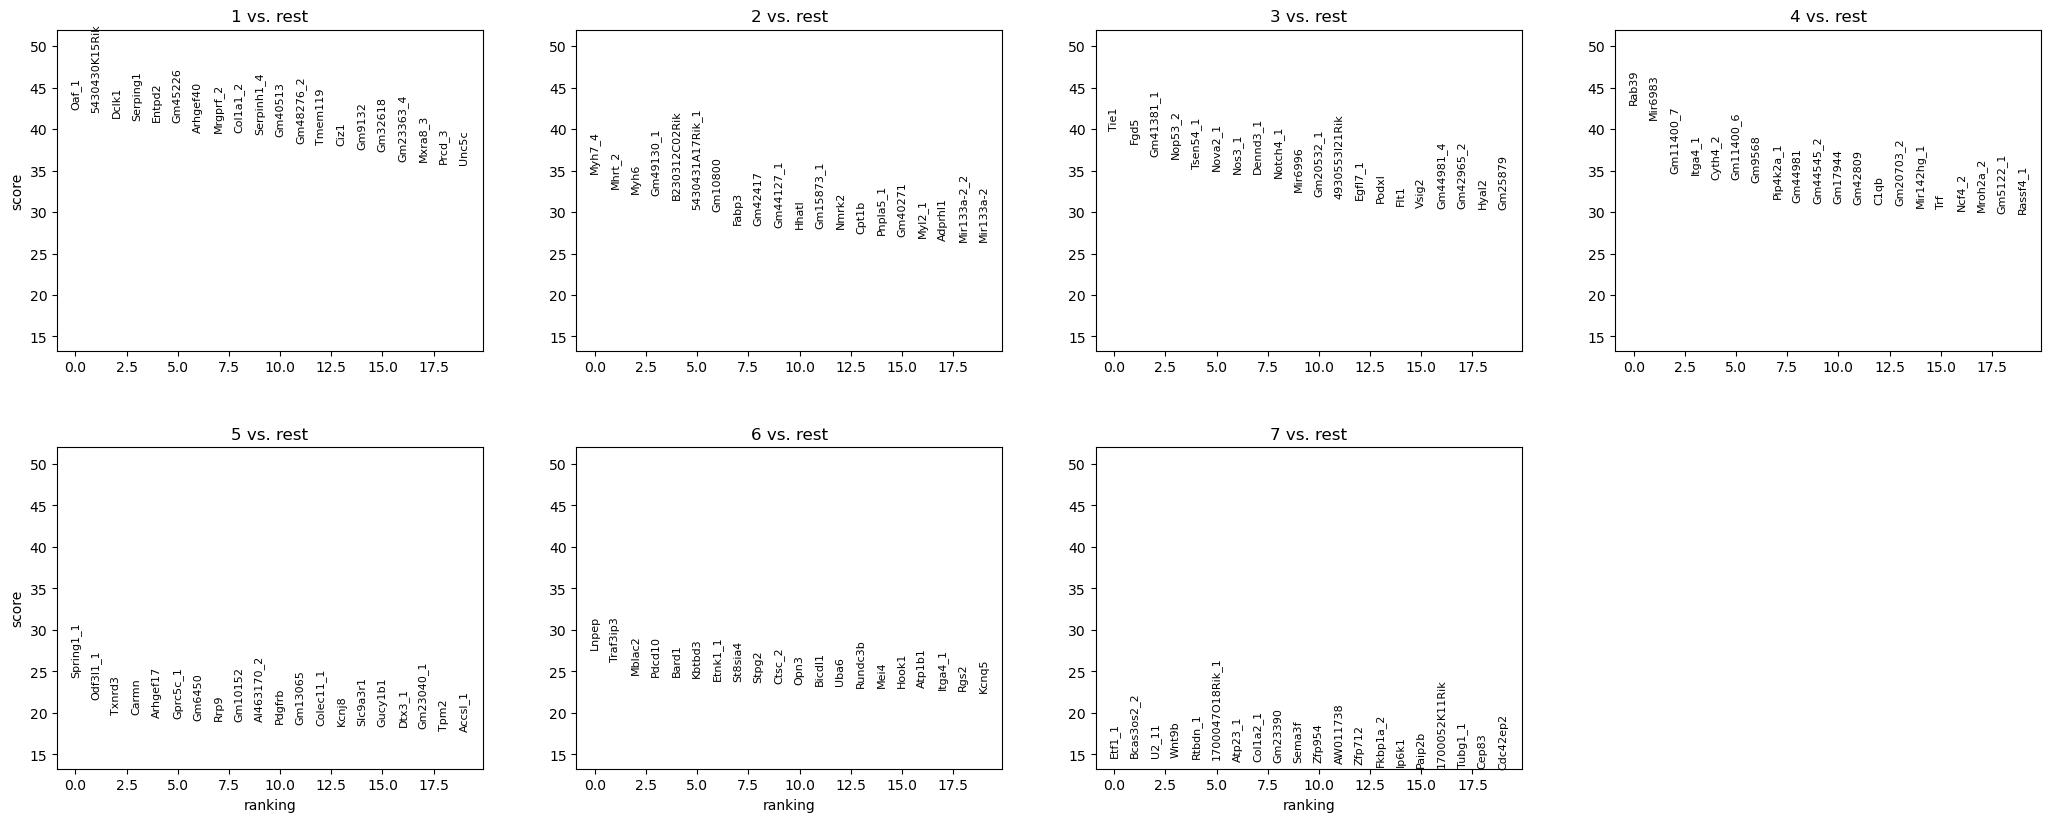

Plotting ranked genes groups for leiden with resolution: 0.2


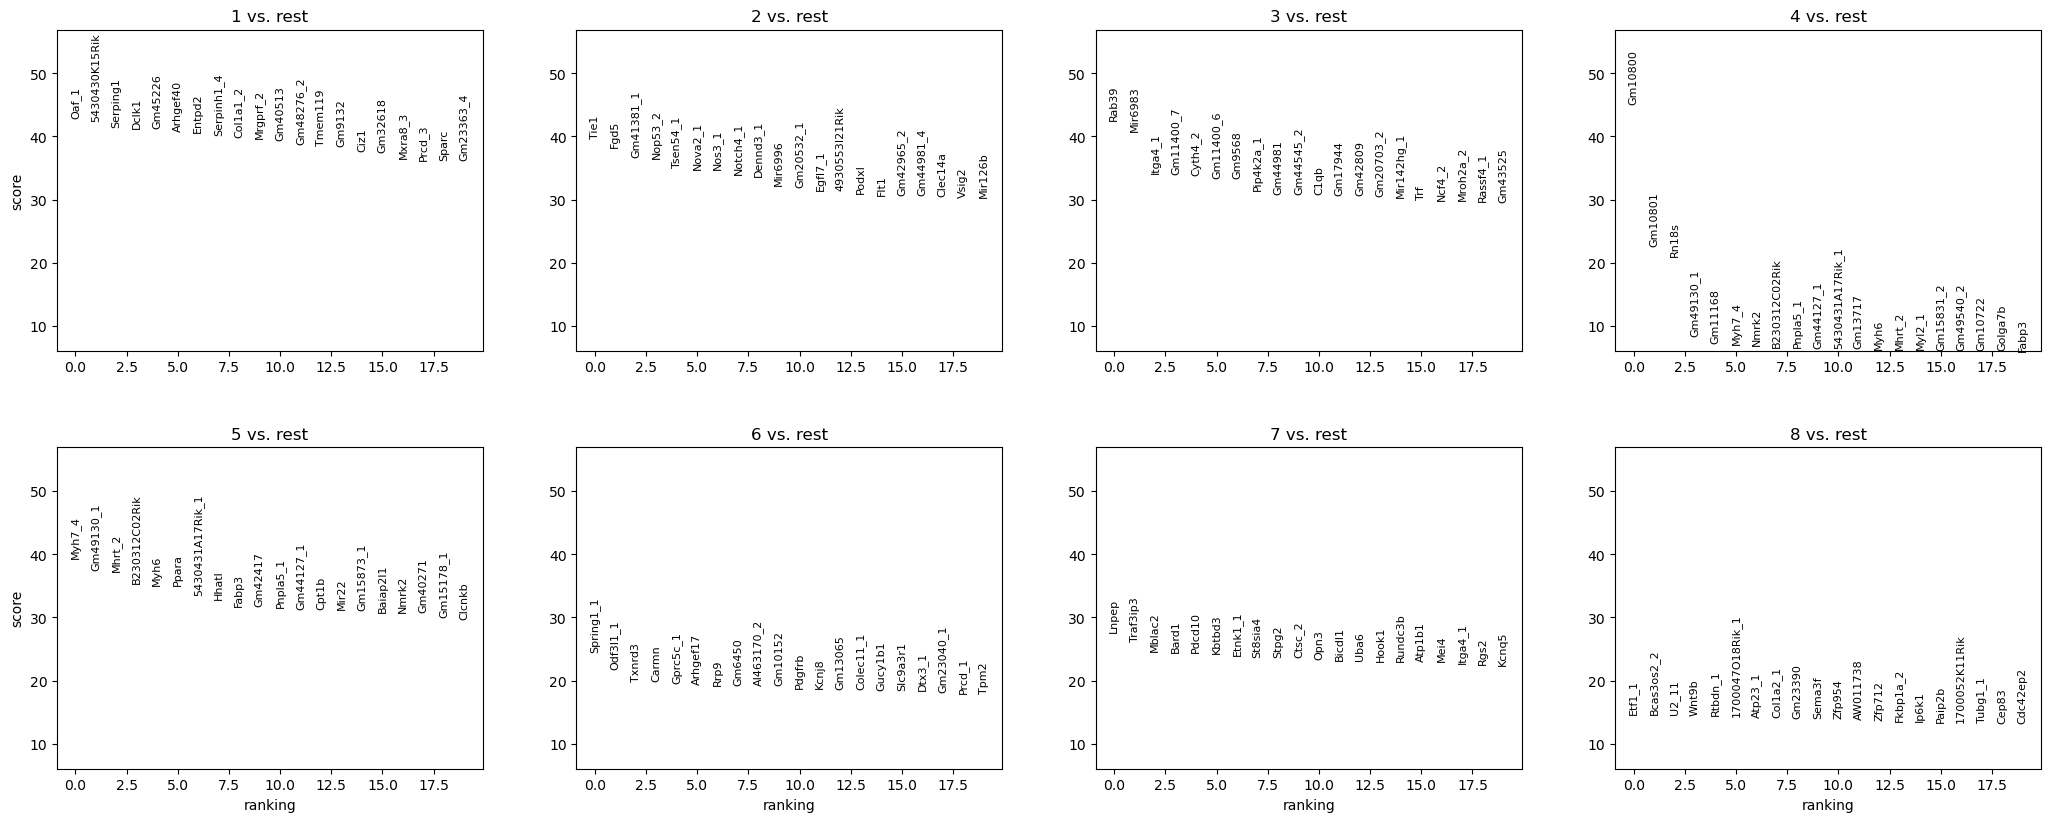

Plotting ranked genes groups for leiden with resolution: 0.3


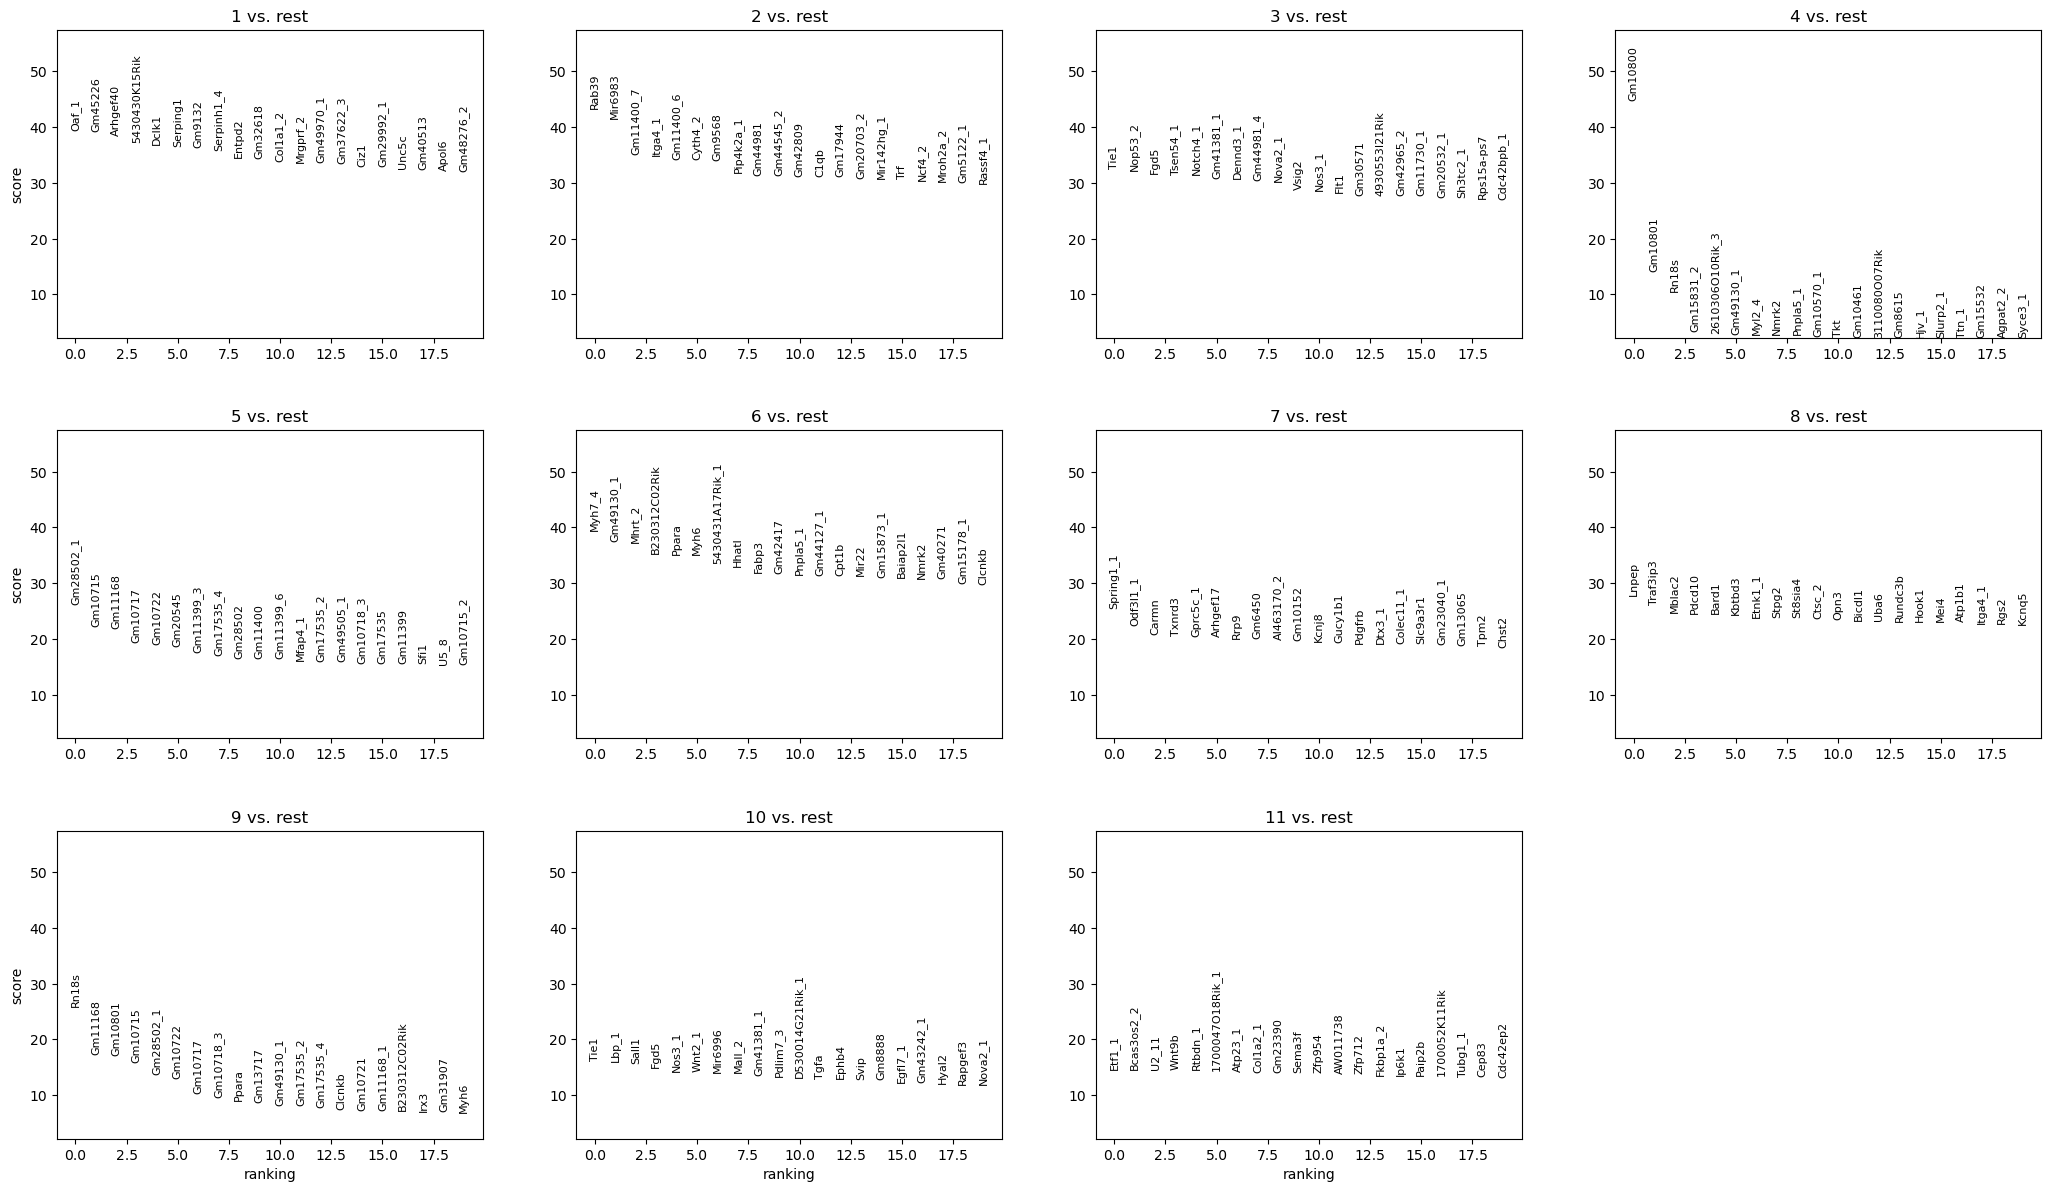

Plotting ranked genes groups for leiden with resolution: 0.4


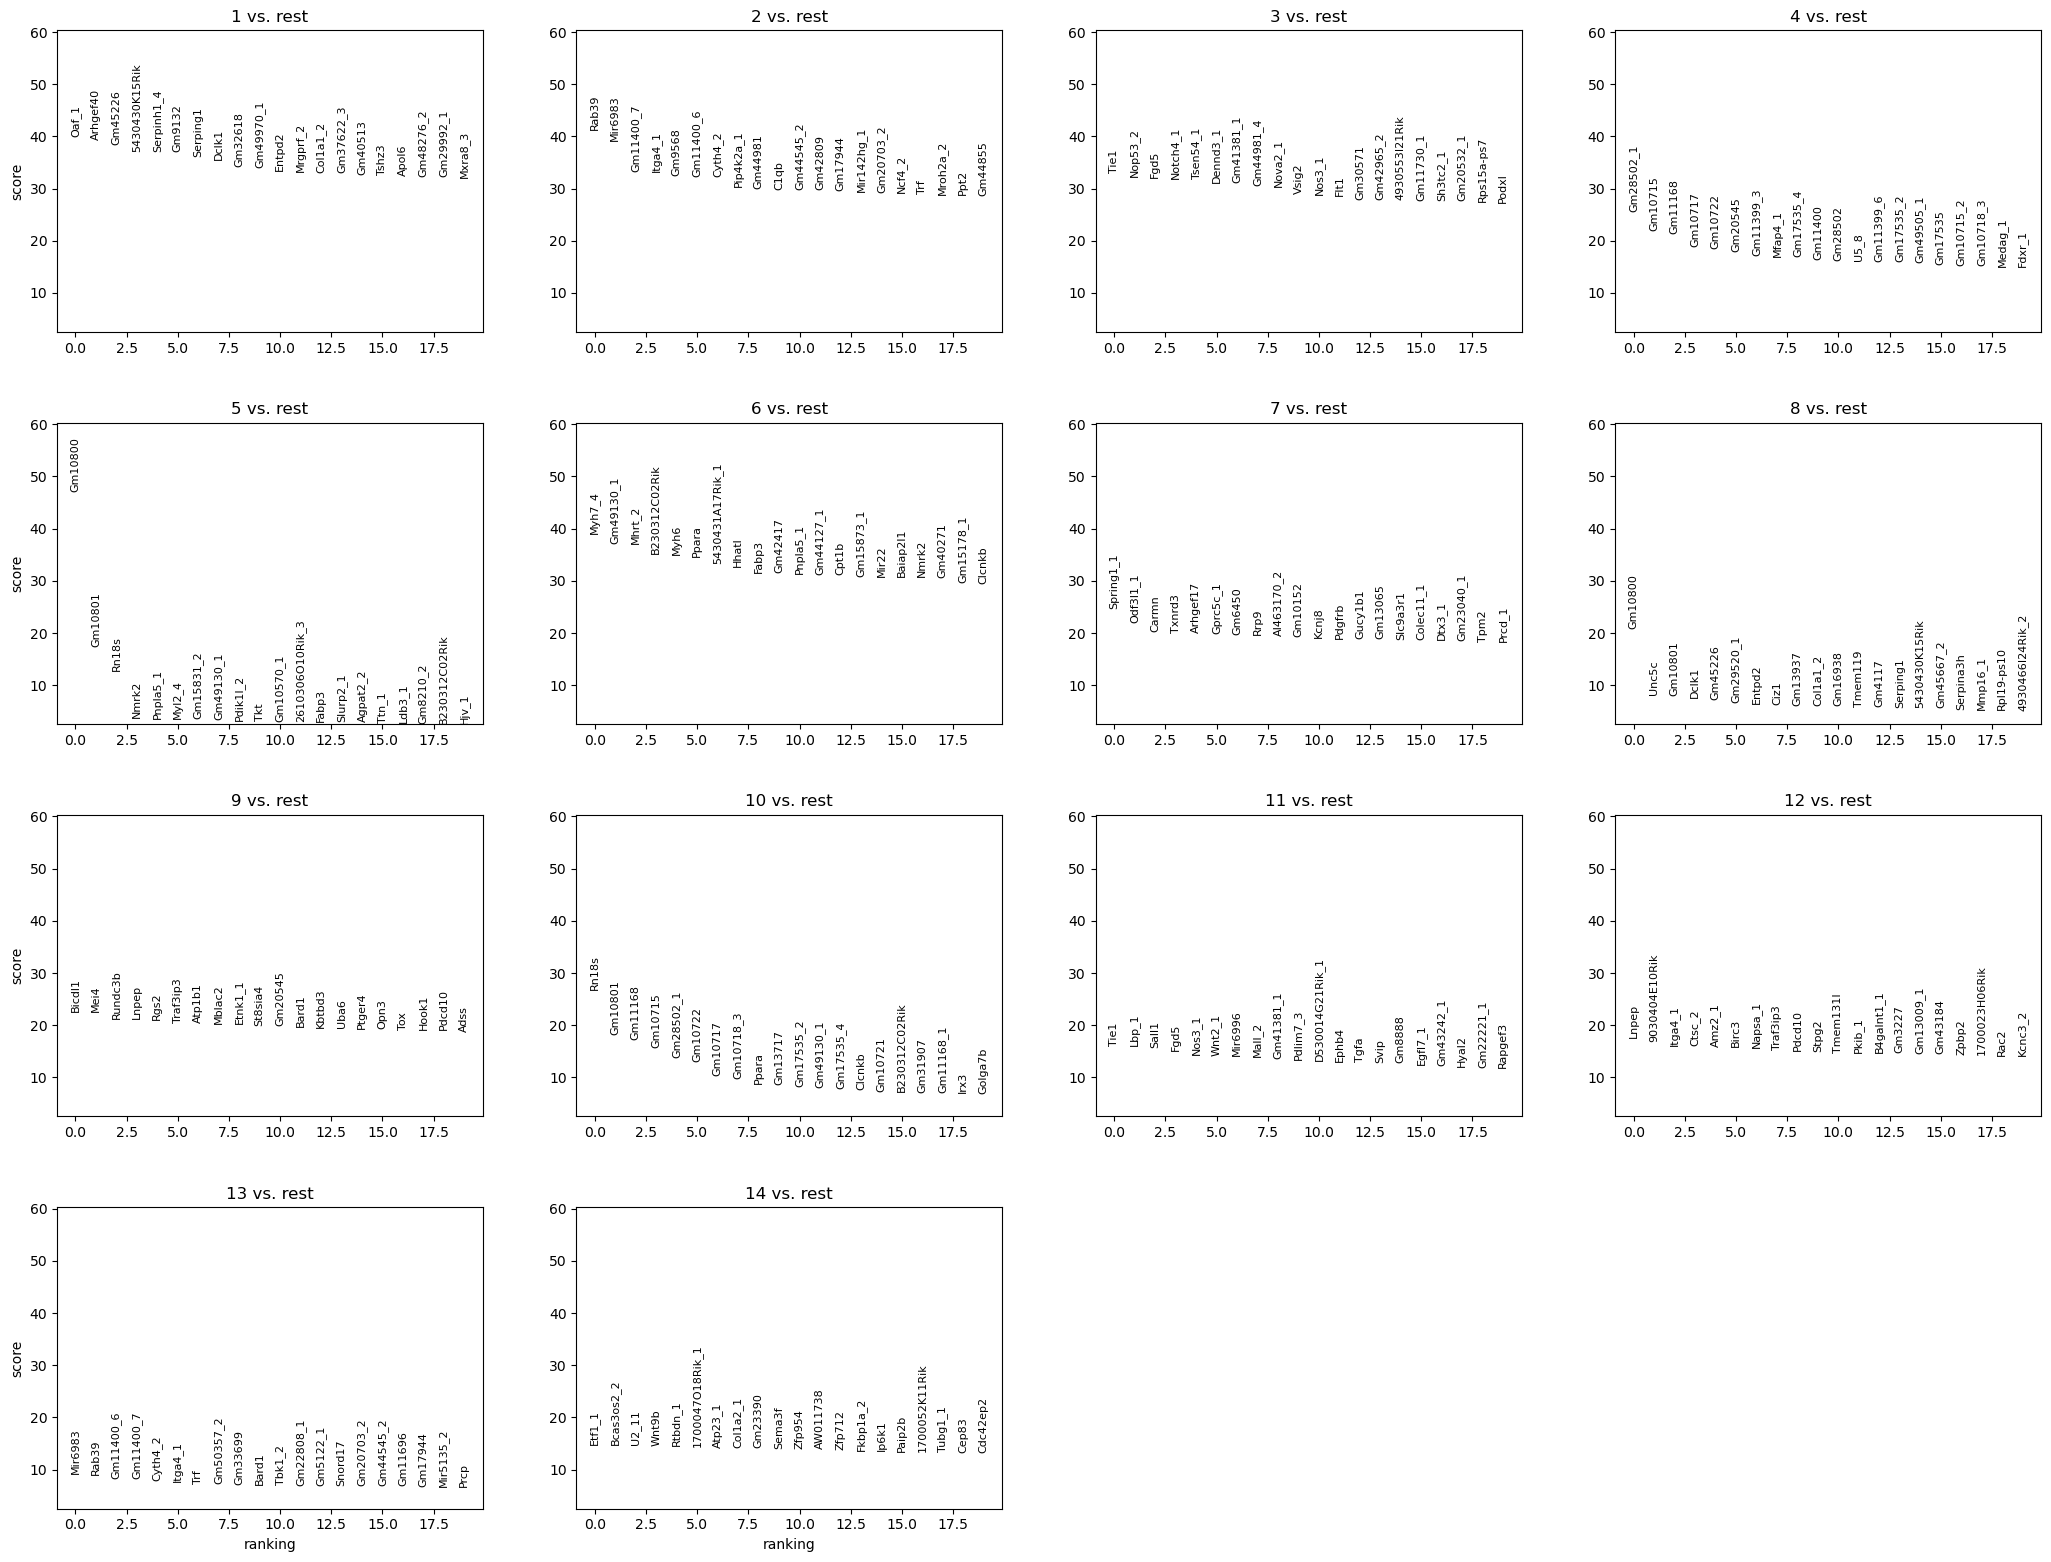

Plotting ranked genes groups for leiden with resolution: 0.5


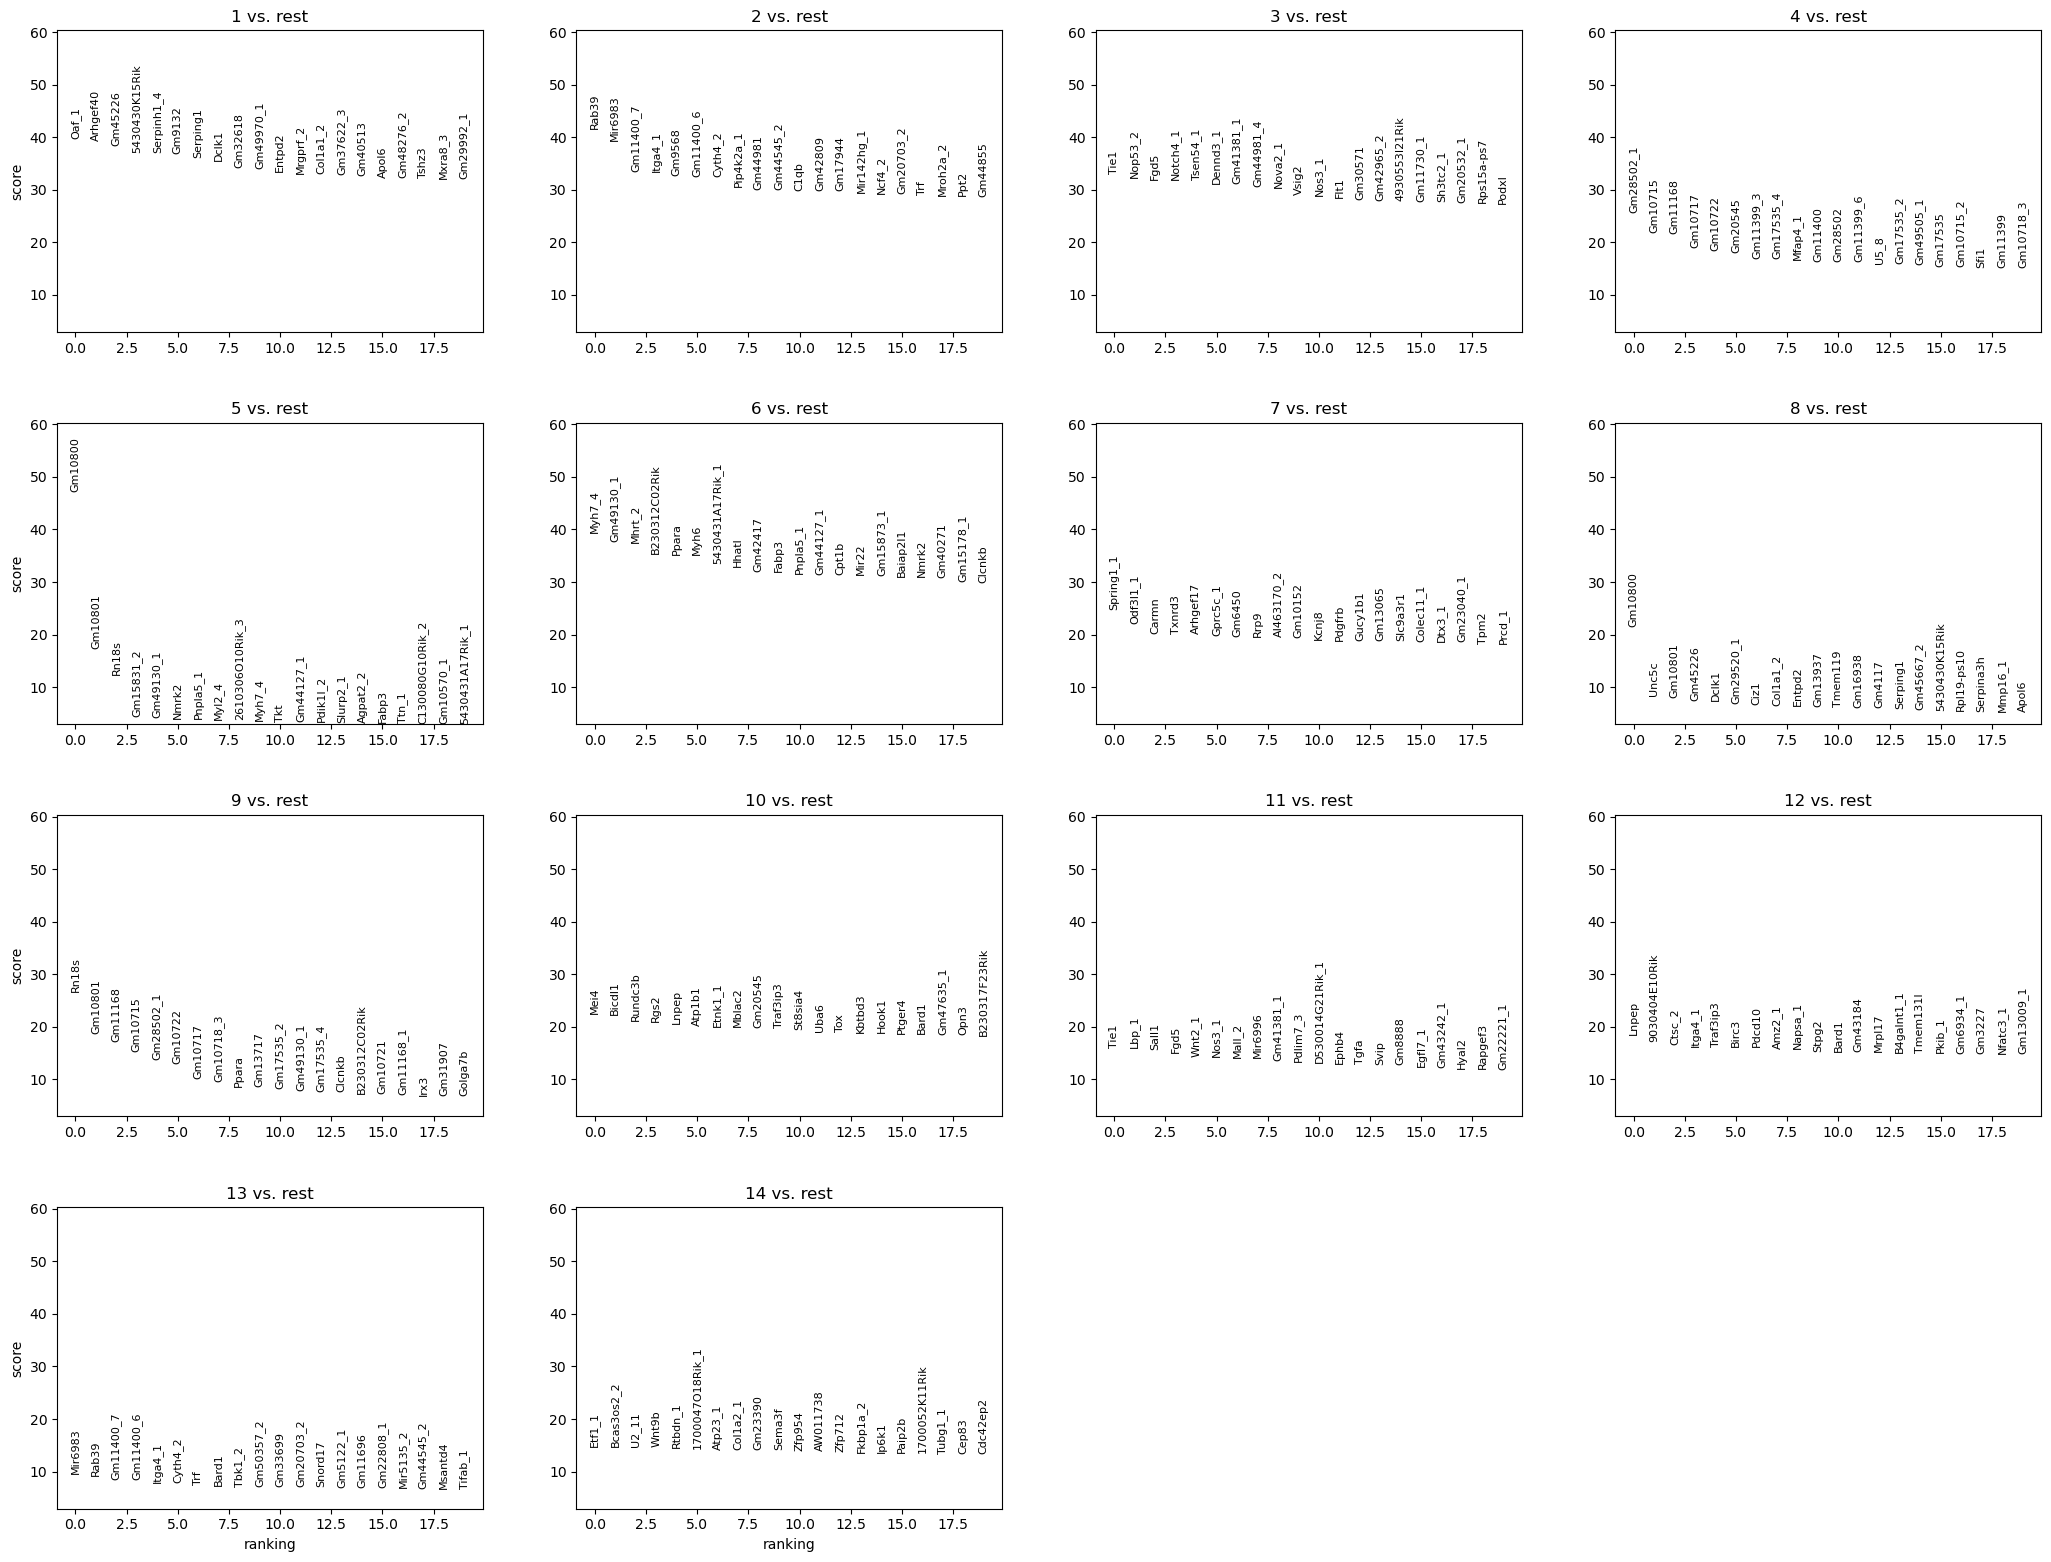

Plotting ranked genes groups for leiden with resolution: 0.6


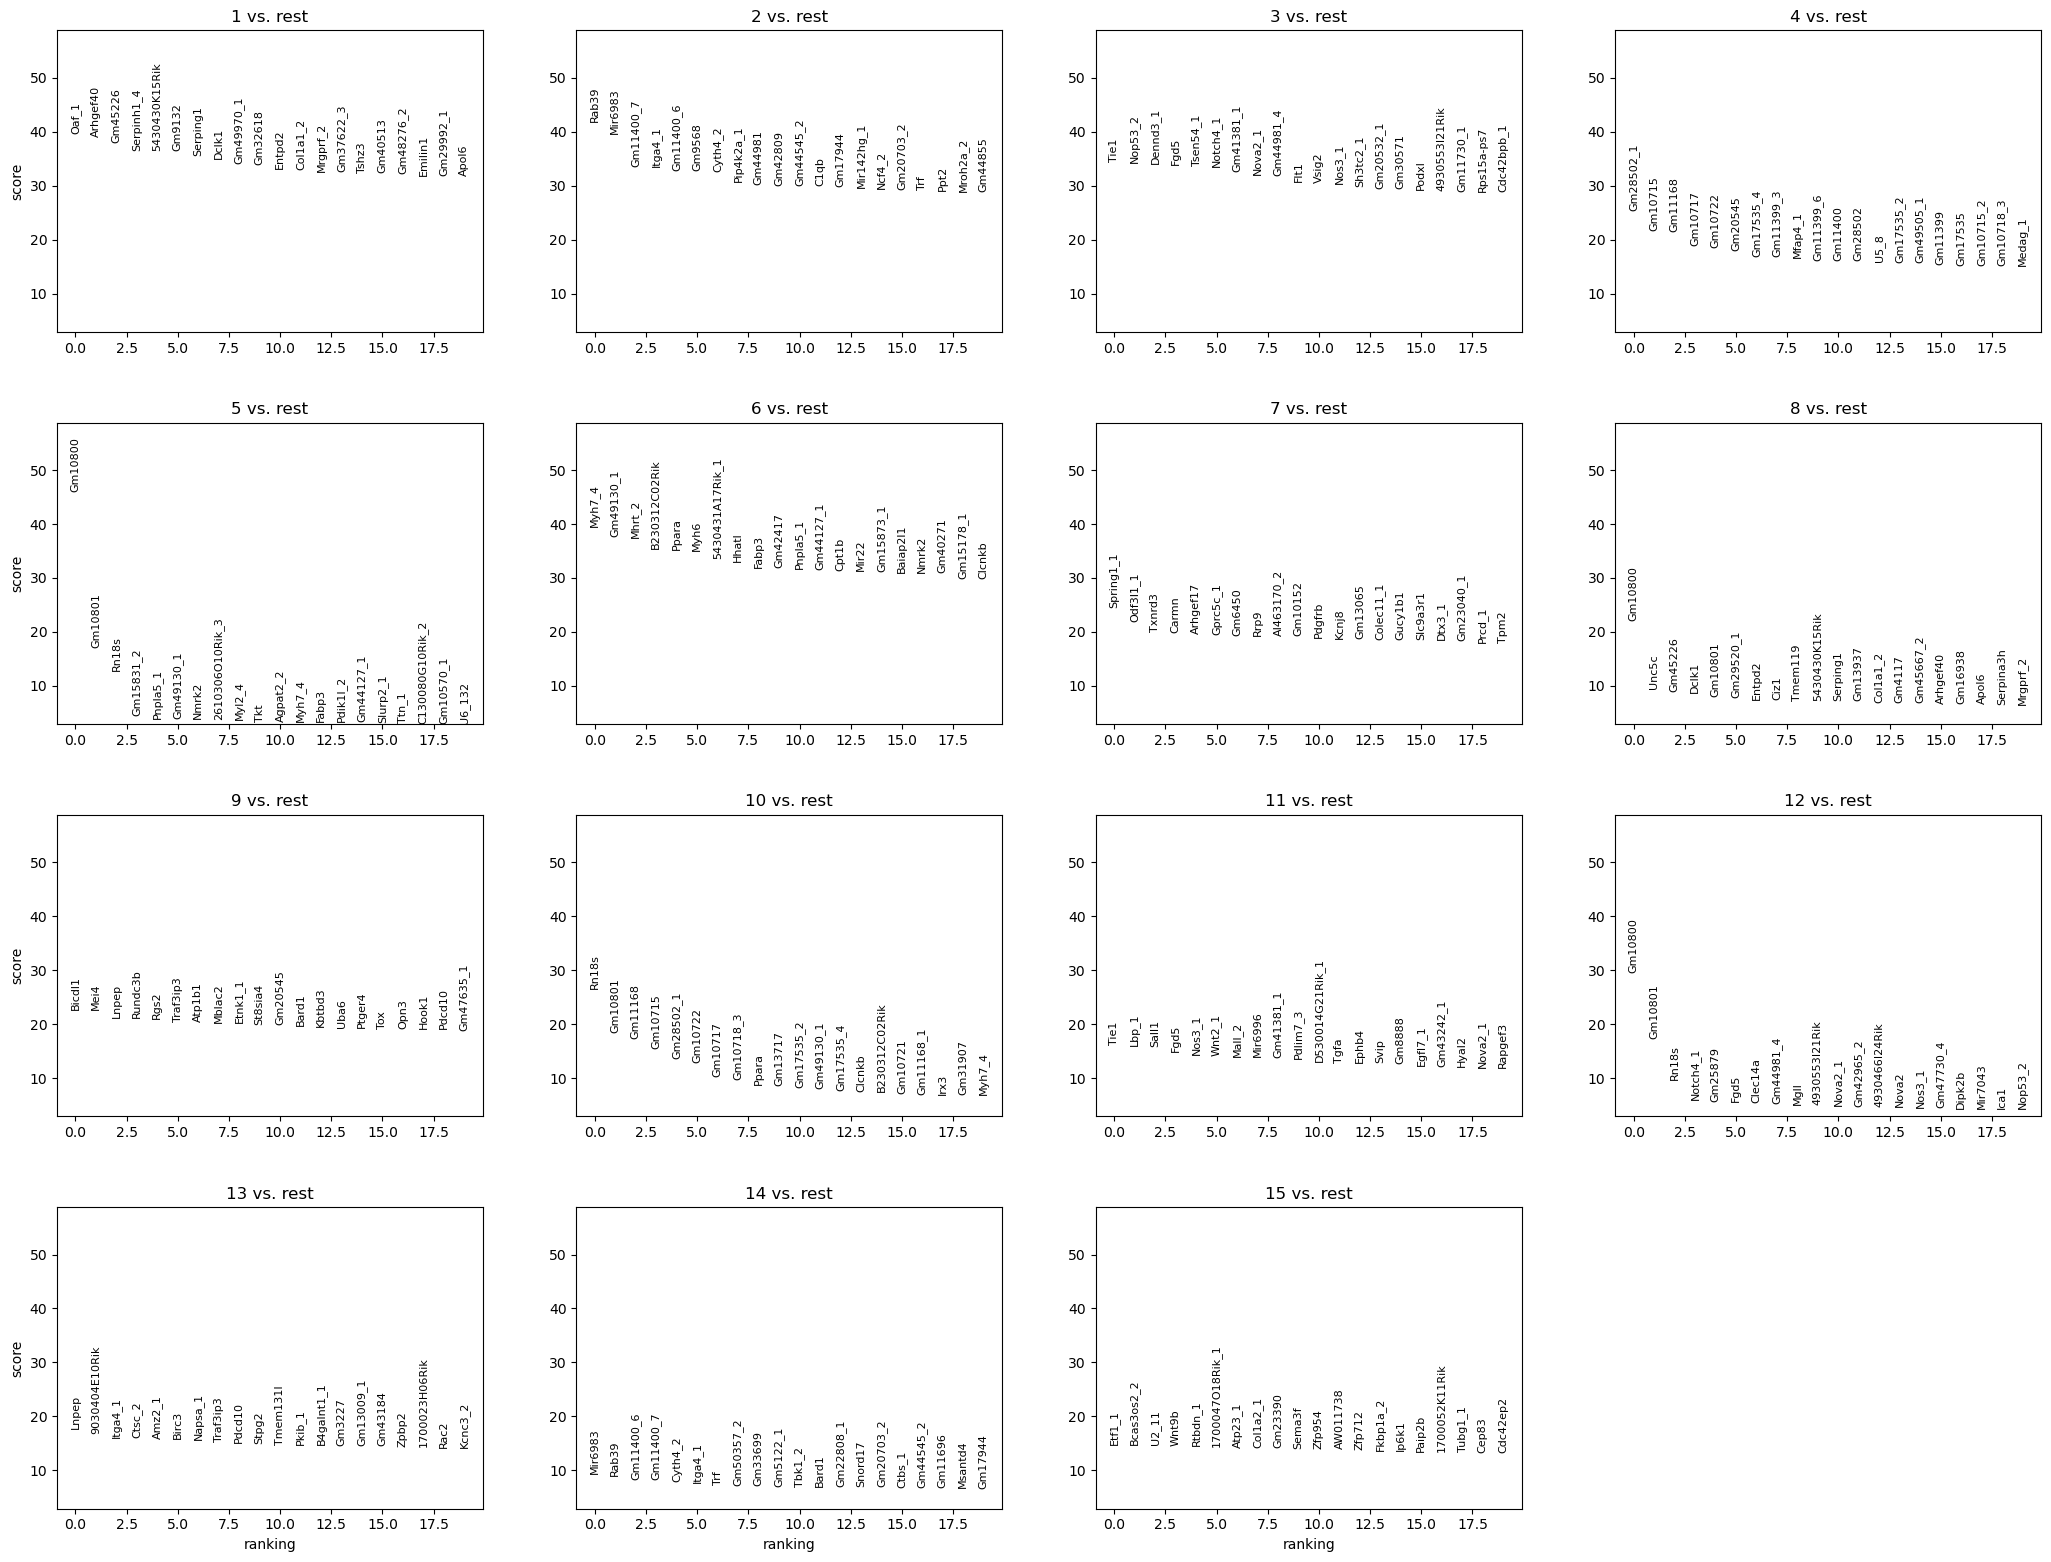

Plotting ranked genes groups for leiden with resolution: 0.7


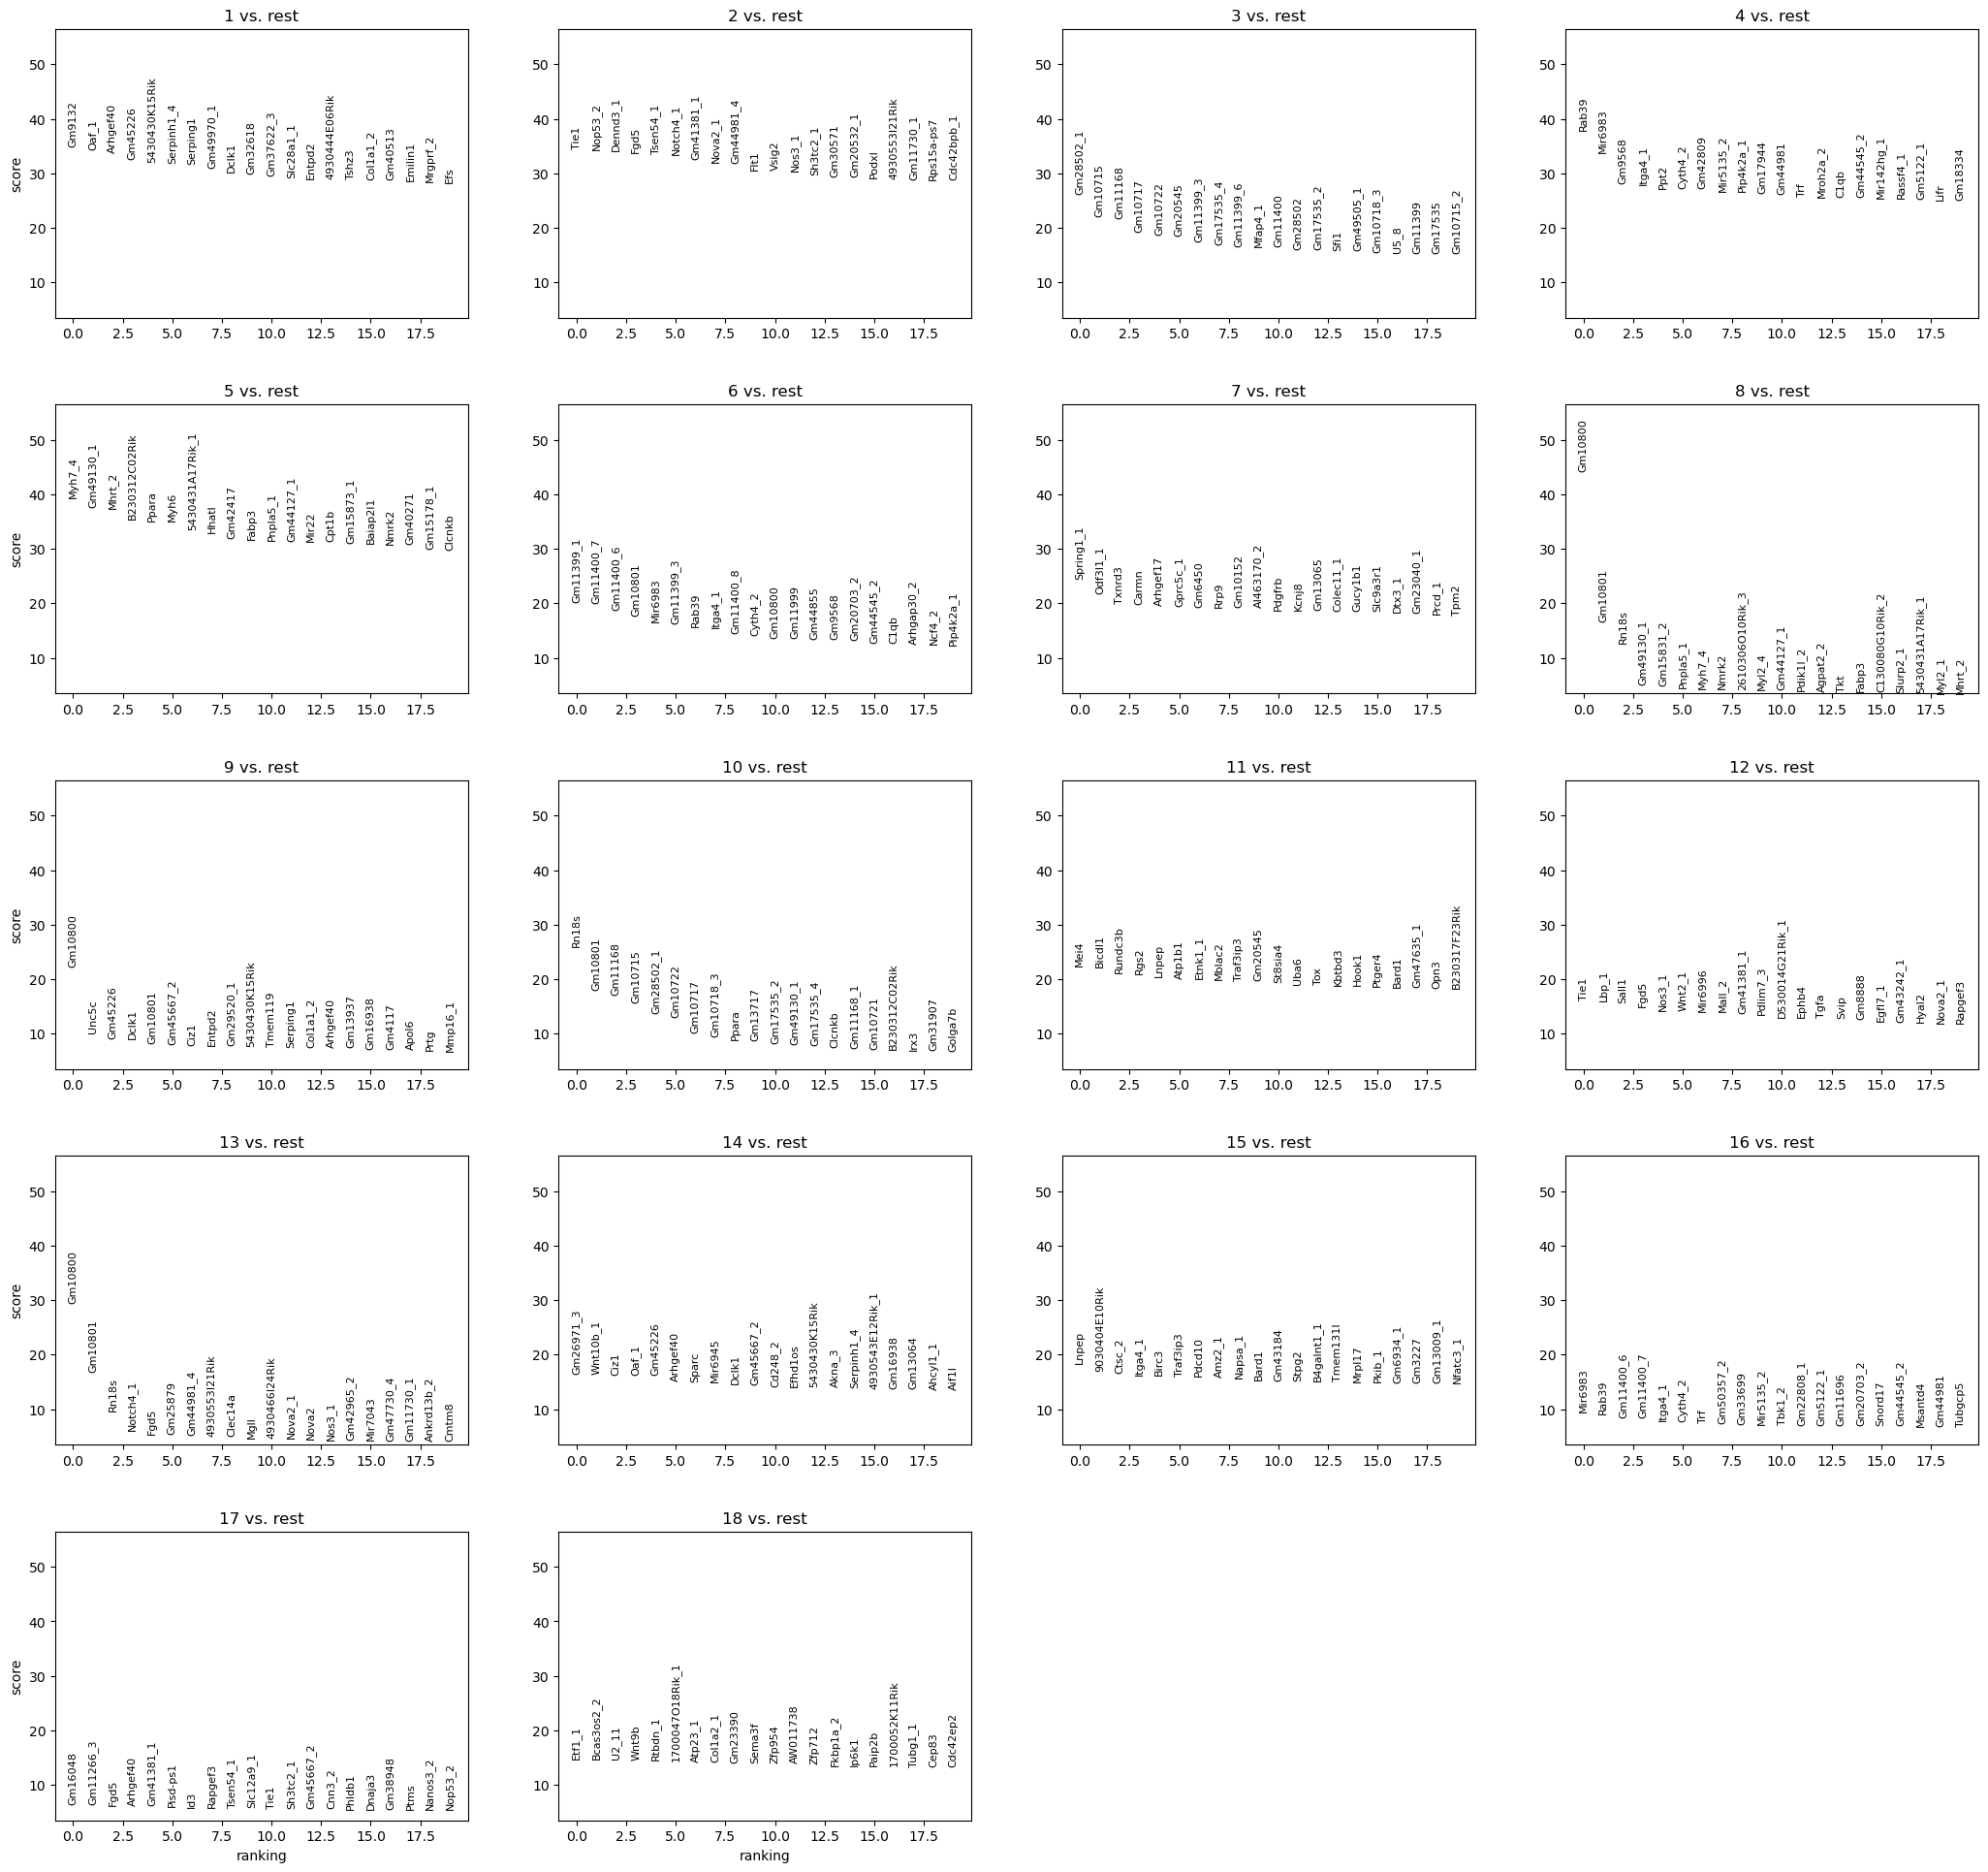

Plotting ranked genes groups for leiden with resolution: 0.8


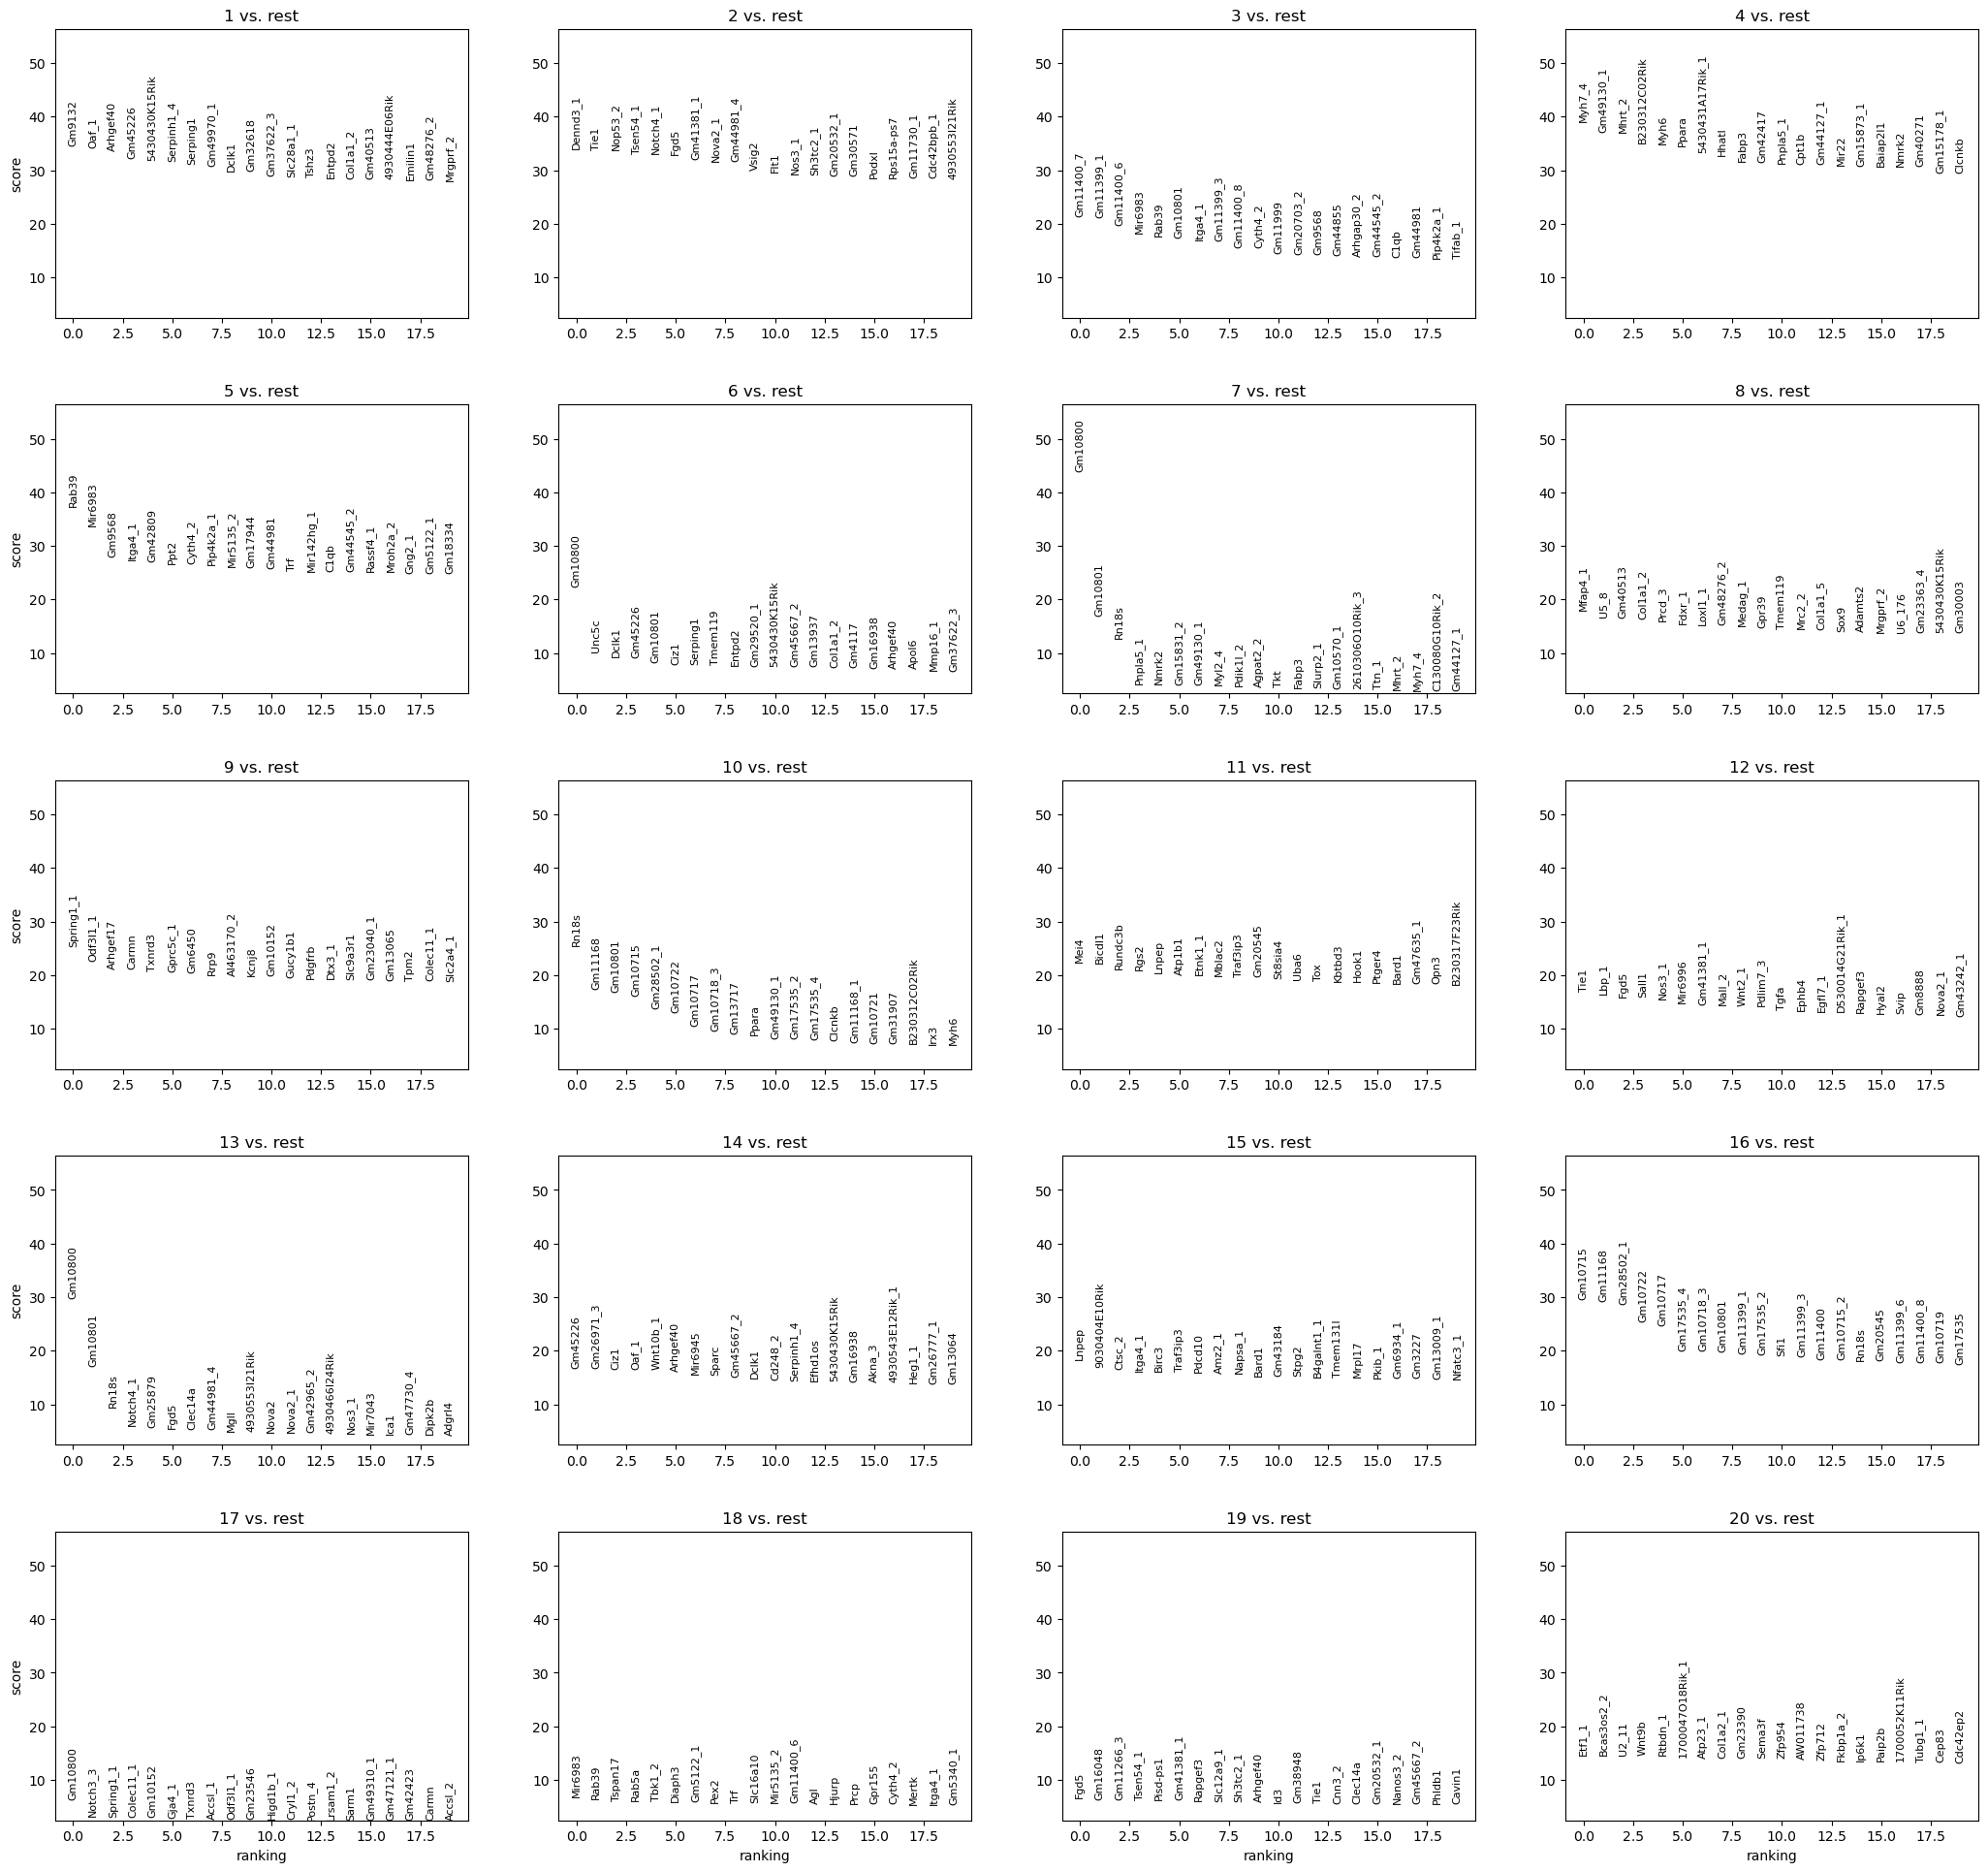

Plotting ranked genes groups for leiden with resolution: 0.9


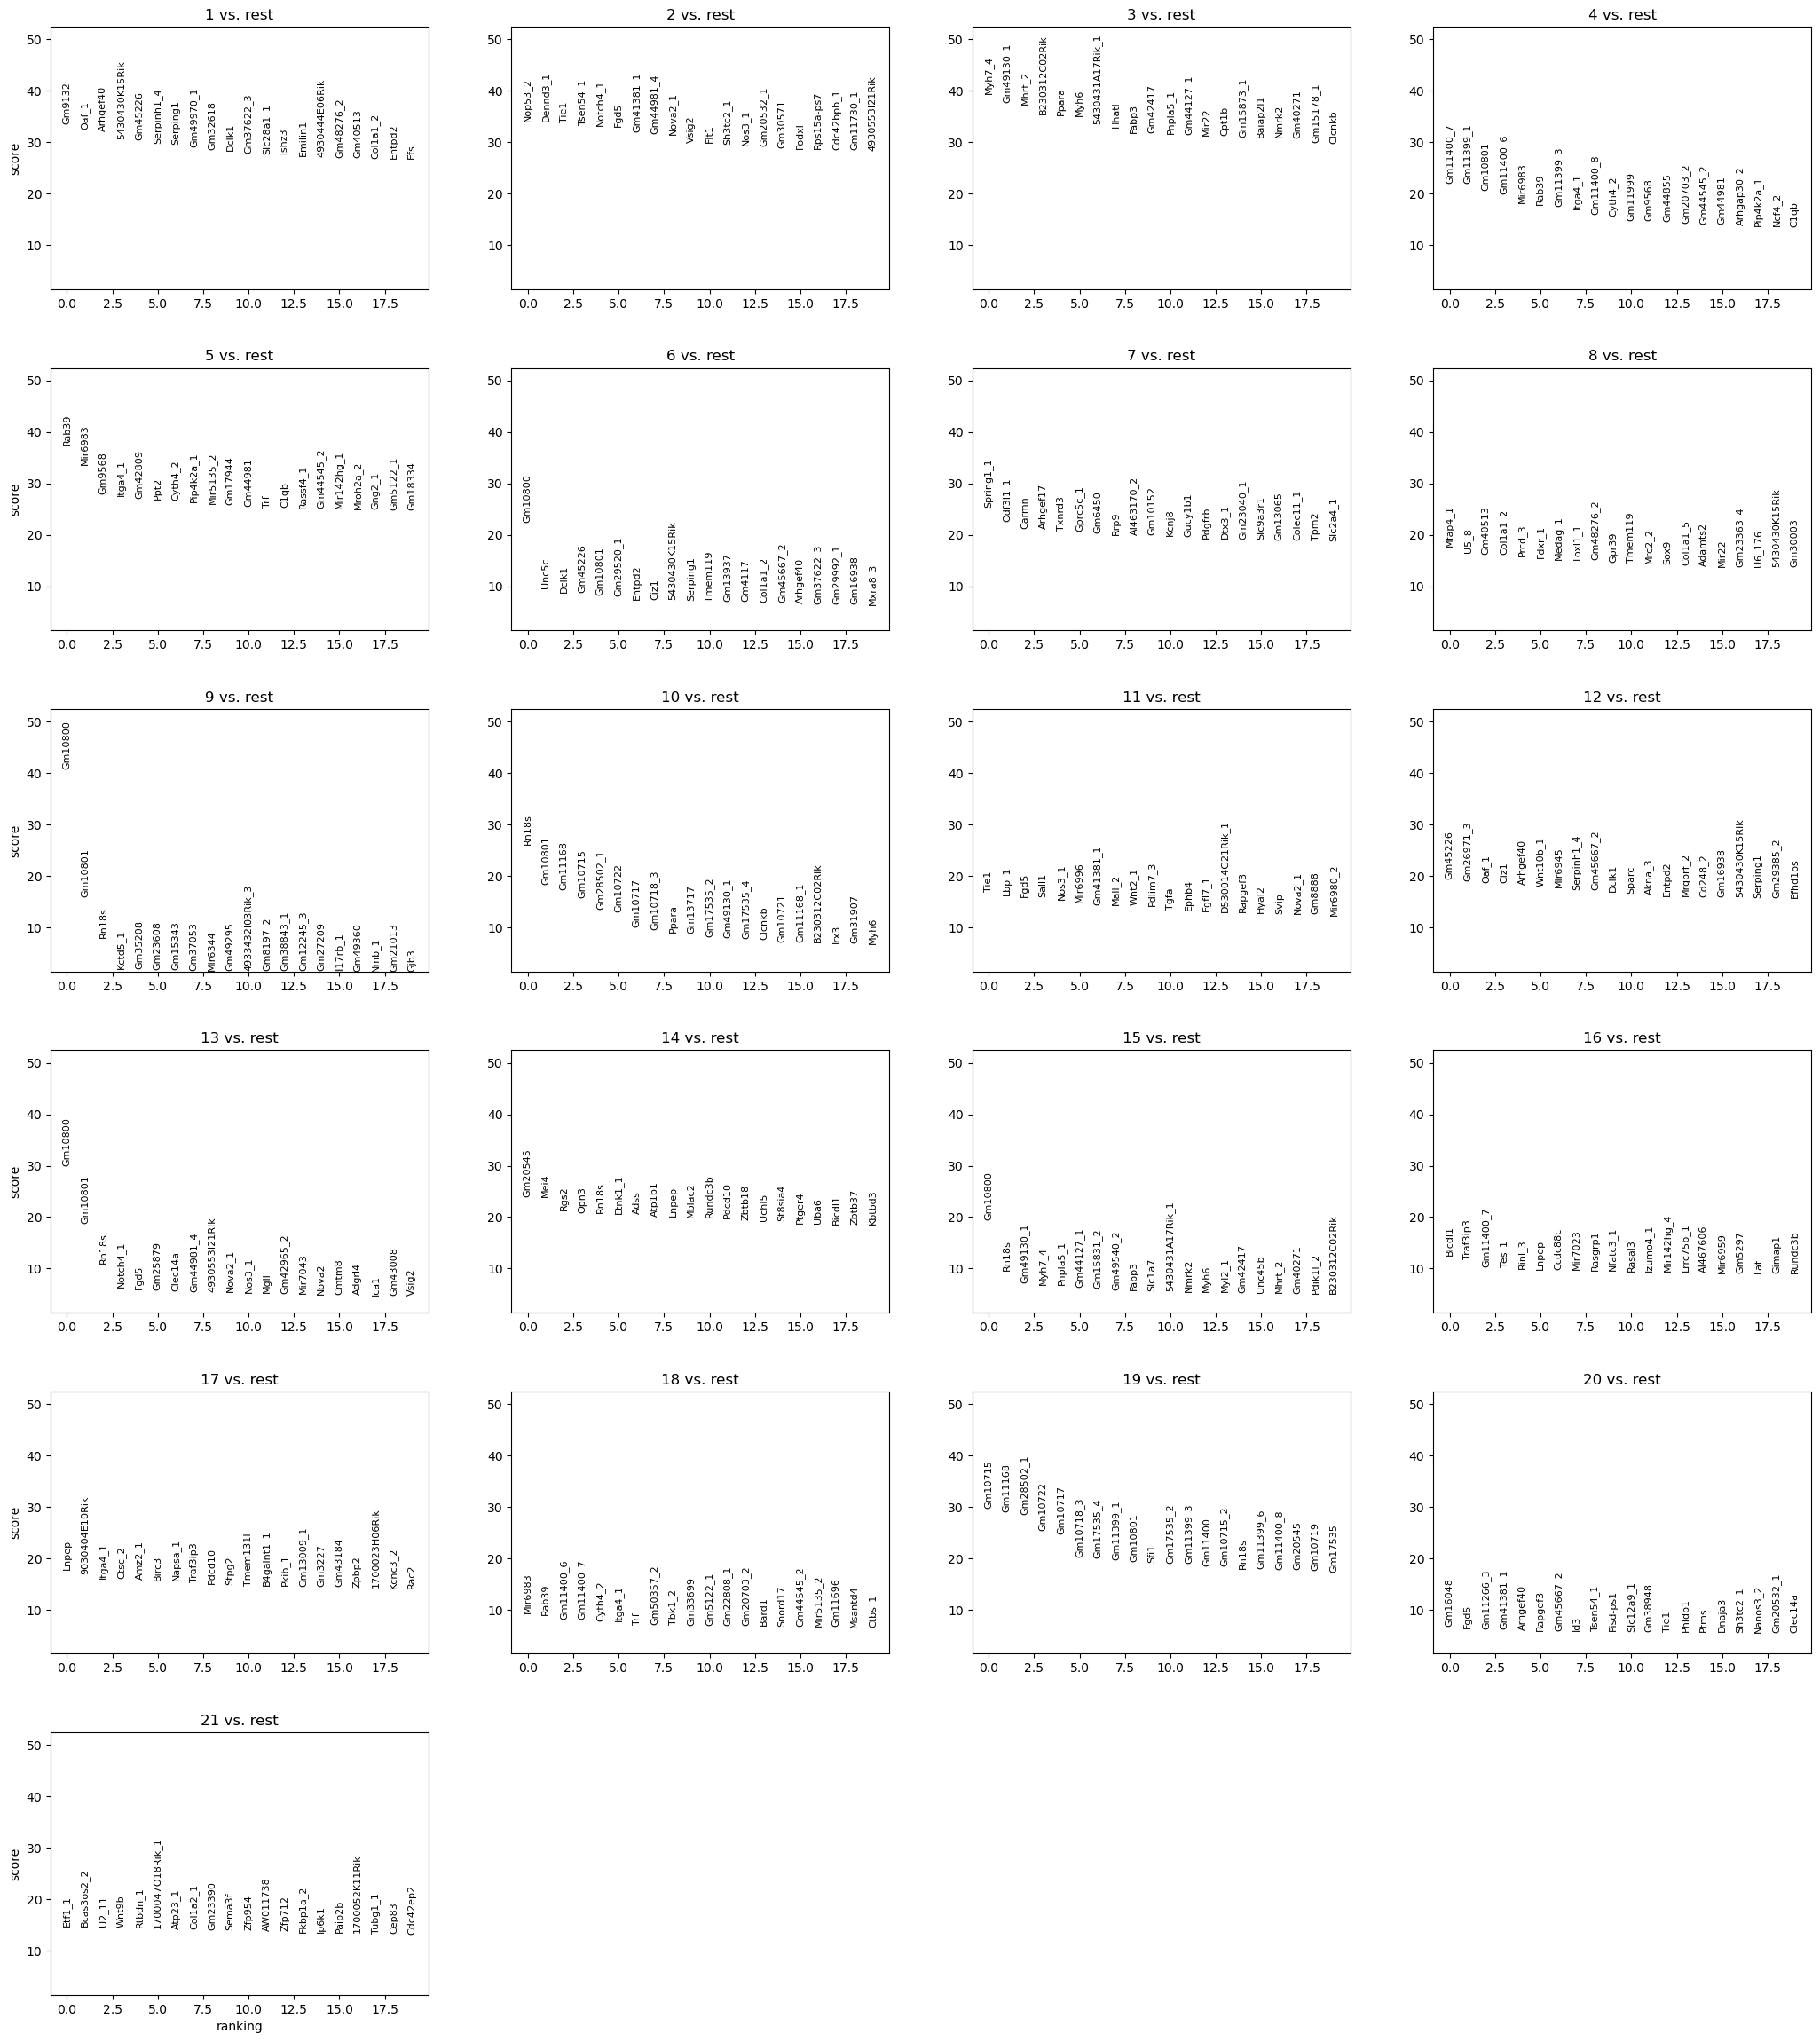

In [25]:
for res in resolutions:
    print(f'Plotting ranked genes groups for leiden with resolution: {res}')
    plot_key = 'rank_genes_groups_' + str(res)
    sc.pl.rank_genes_groups(genes_adata, key=plot_key, show=False)
    # TODO
    # if save_figs:
    #    plt.savefig(f'{OUTPUT_FIGS}/ranked_genes_groups_leiden_{res}.png')
    plt.show()

Plotting matrixplot for leiden with resolution: 0.1


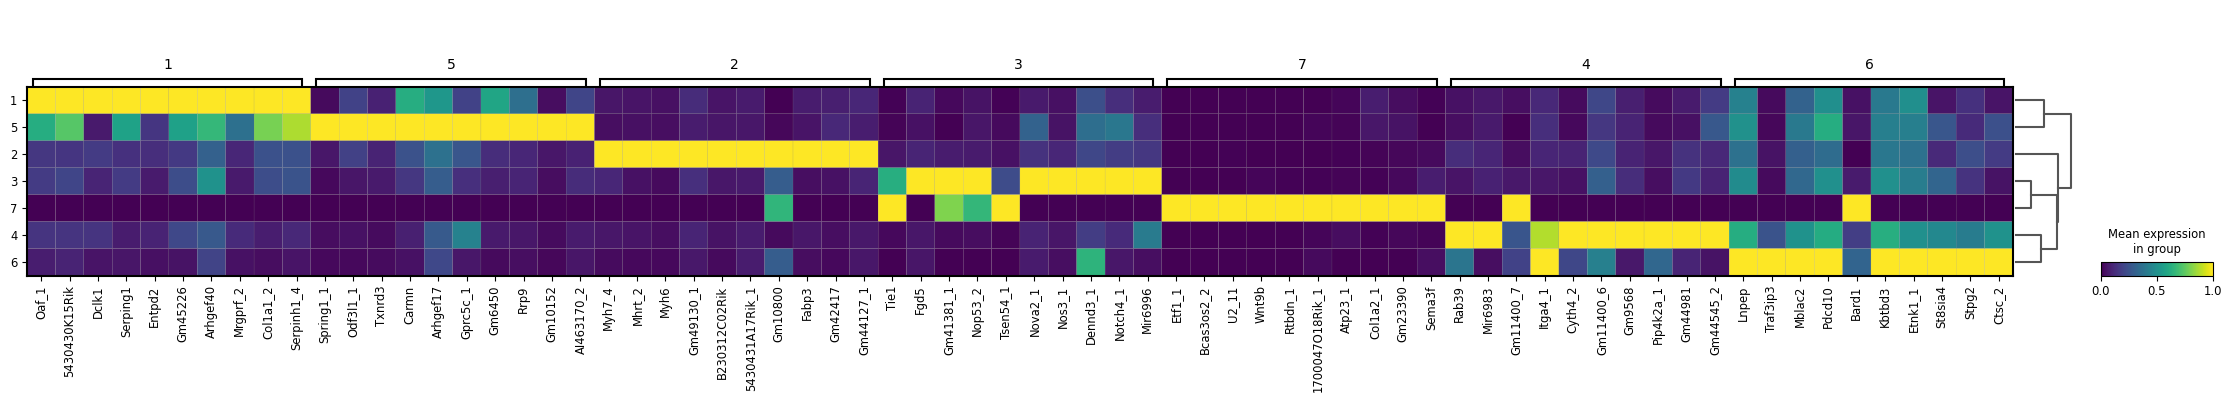

Plotting matrixplot for leiden with resolution: 0.2


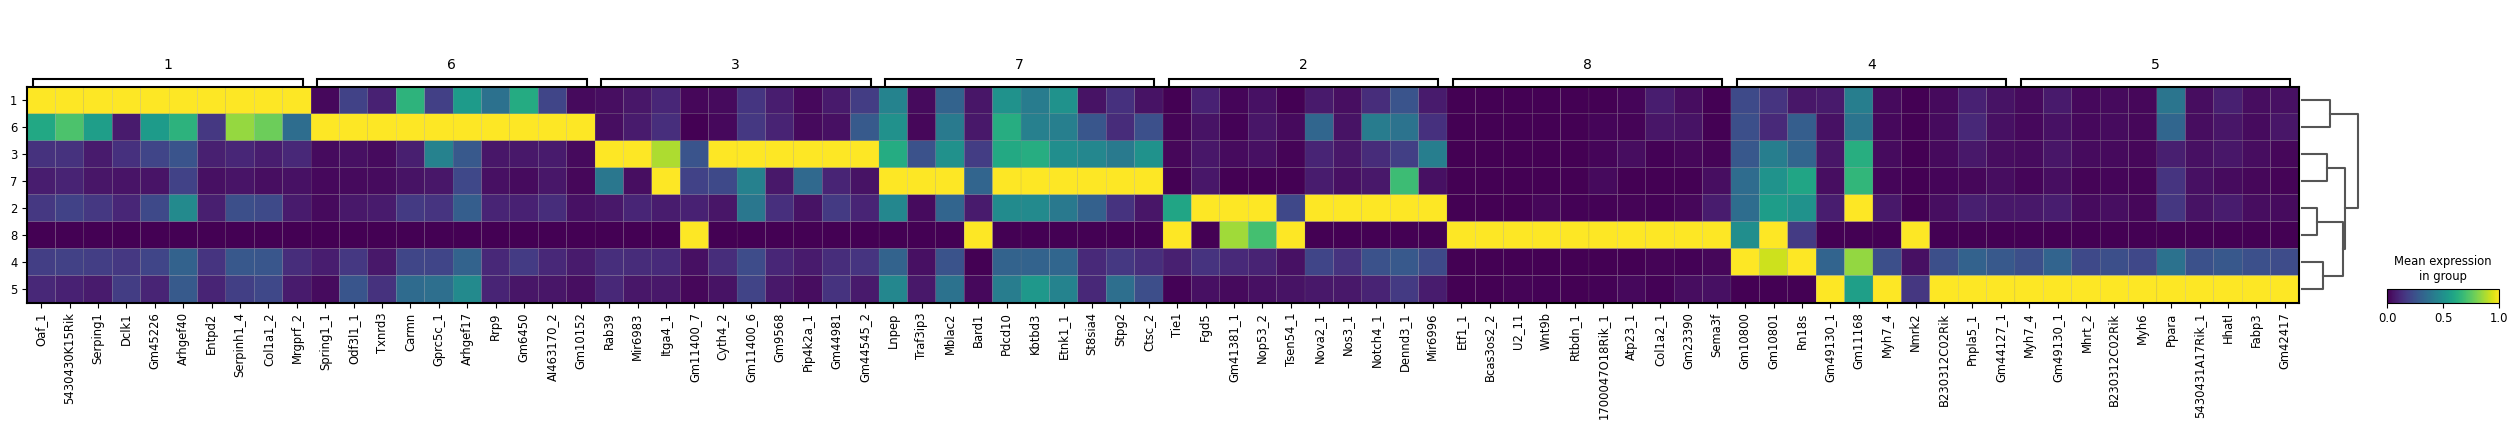

Plotting matrixplot for leiden with resolution: 0.3


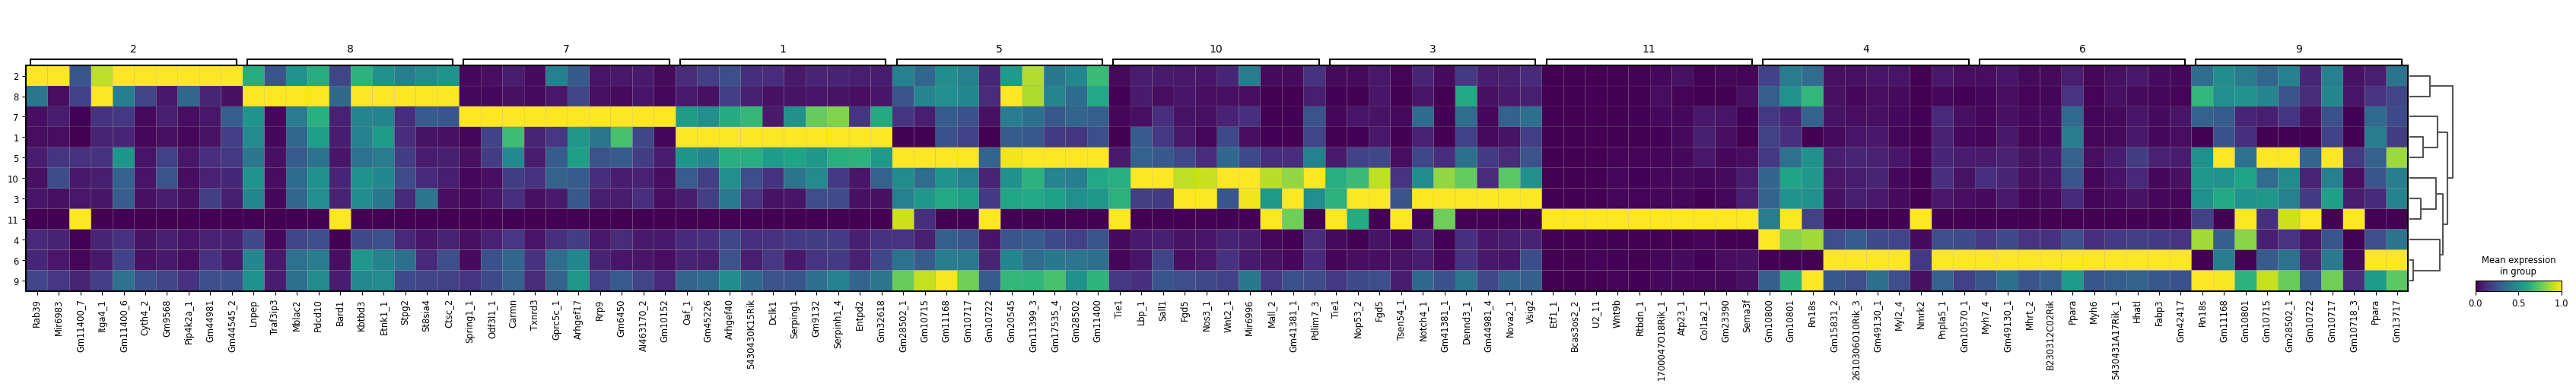

Plotting matrixplot for leiden with resolution: 0.4


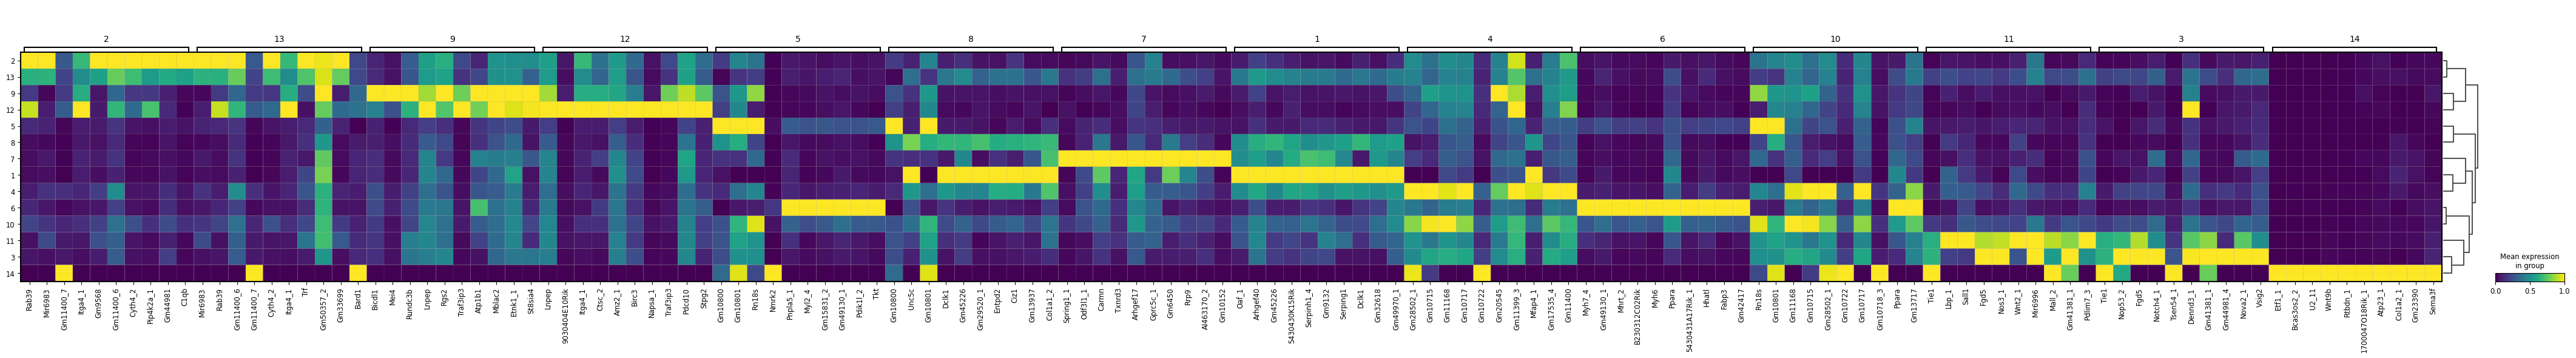

Plotting matrixplot for leiden with resolution: 0.5


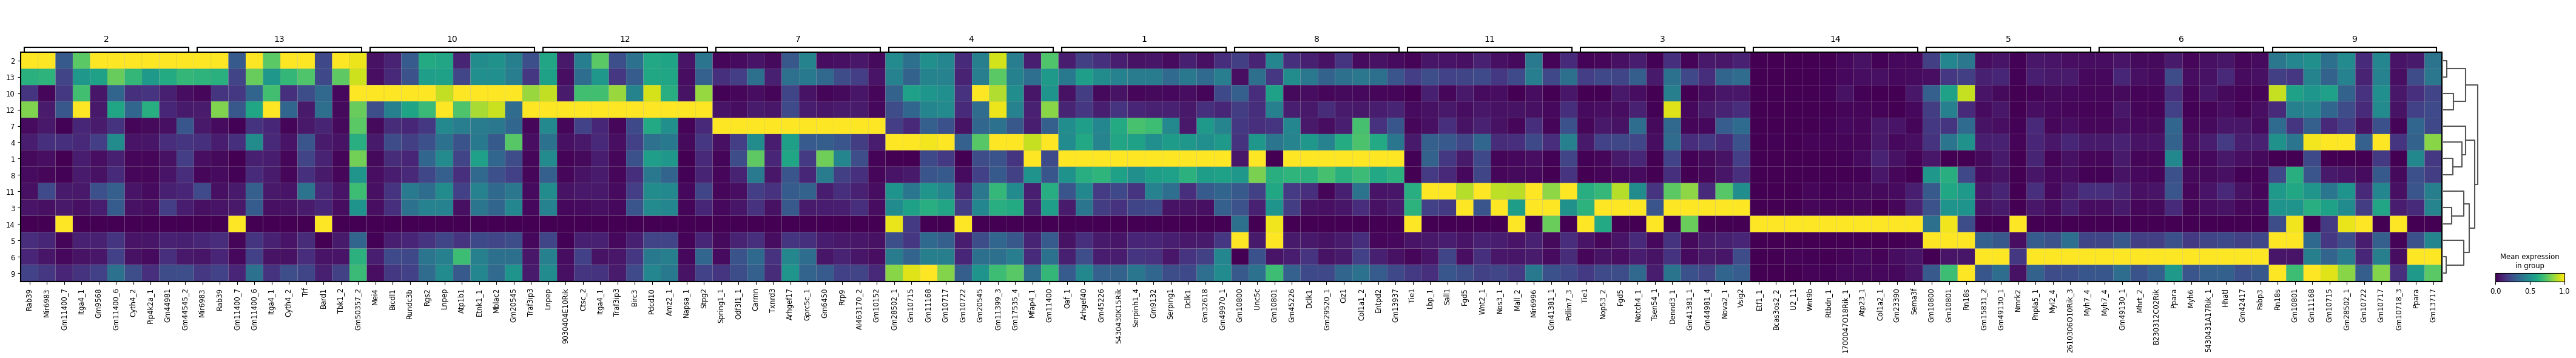

Plotting matrixplot for leiden with resolution: 0.6


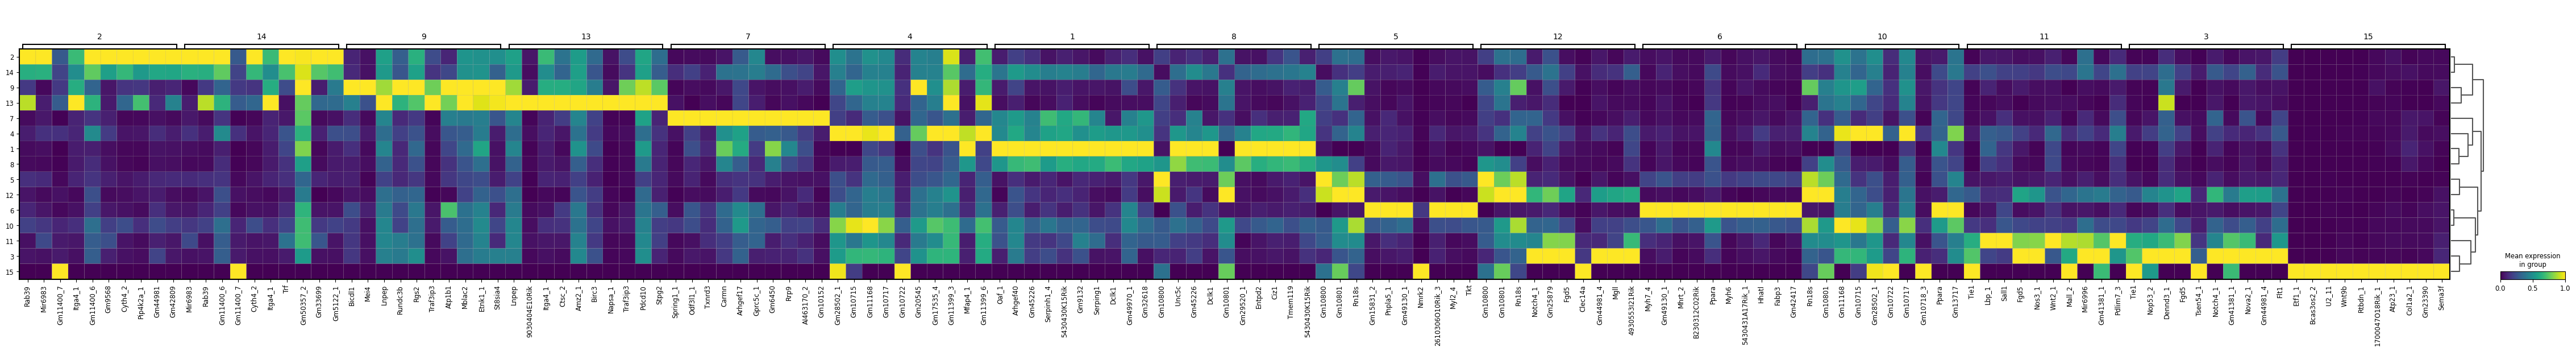

Plotting matrixplot for leiden with resolution: 0.7


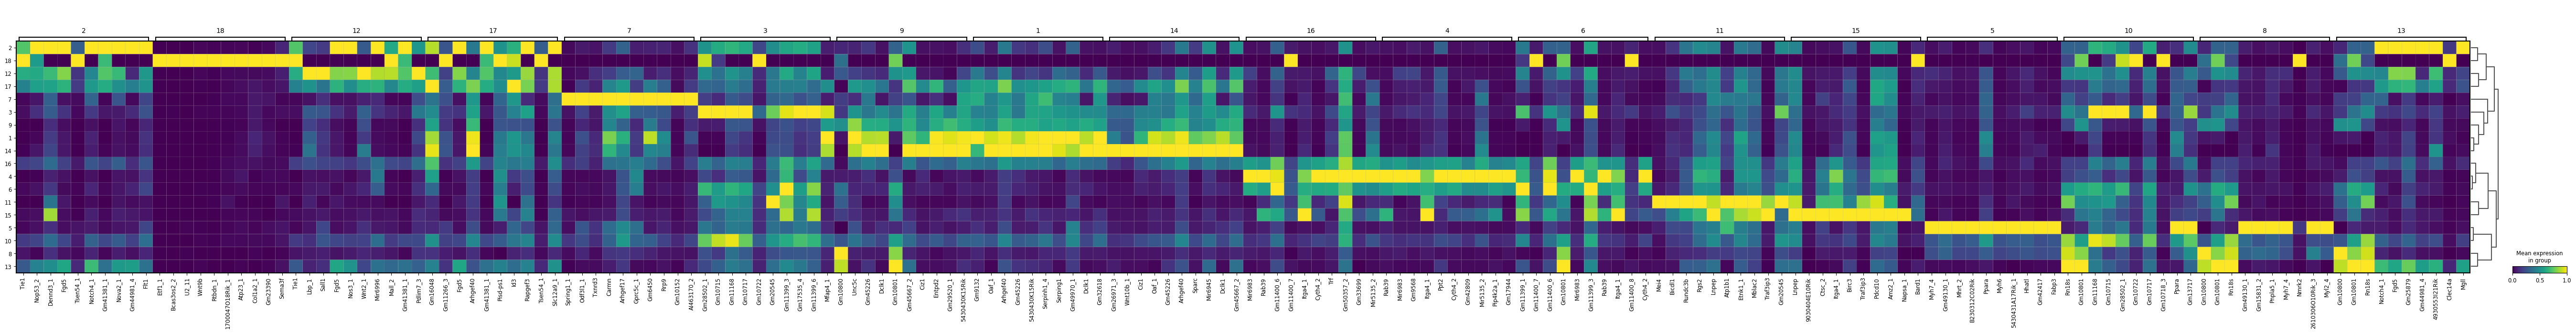

Plotting matrixplot for leiden with resolution: 0.8


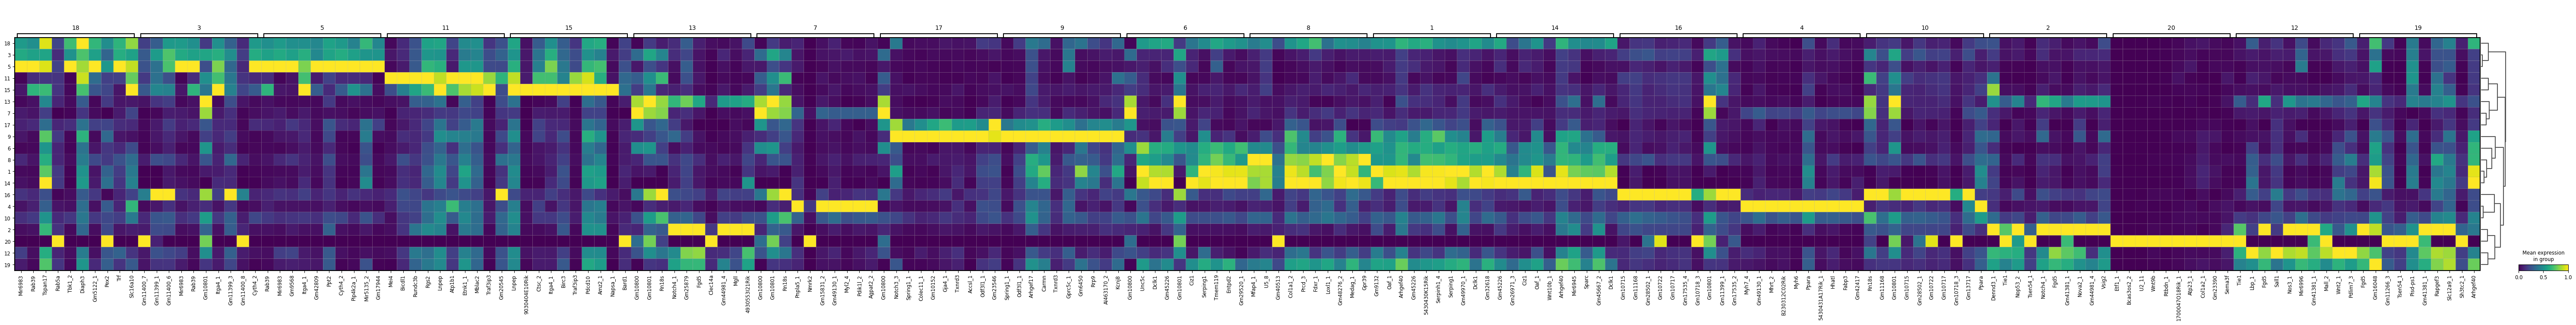

Plotting matrixplot for leiden with resolution: 0.9


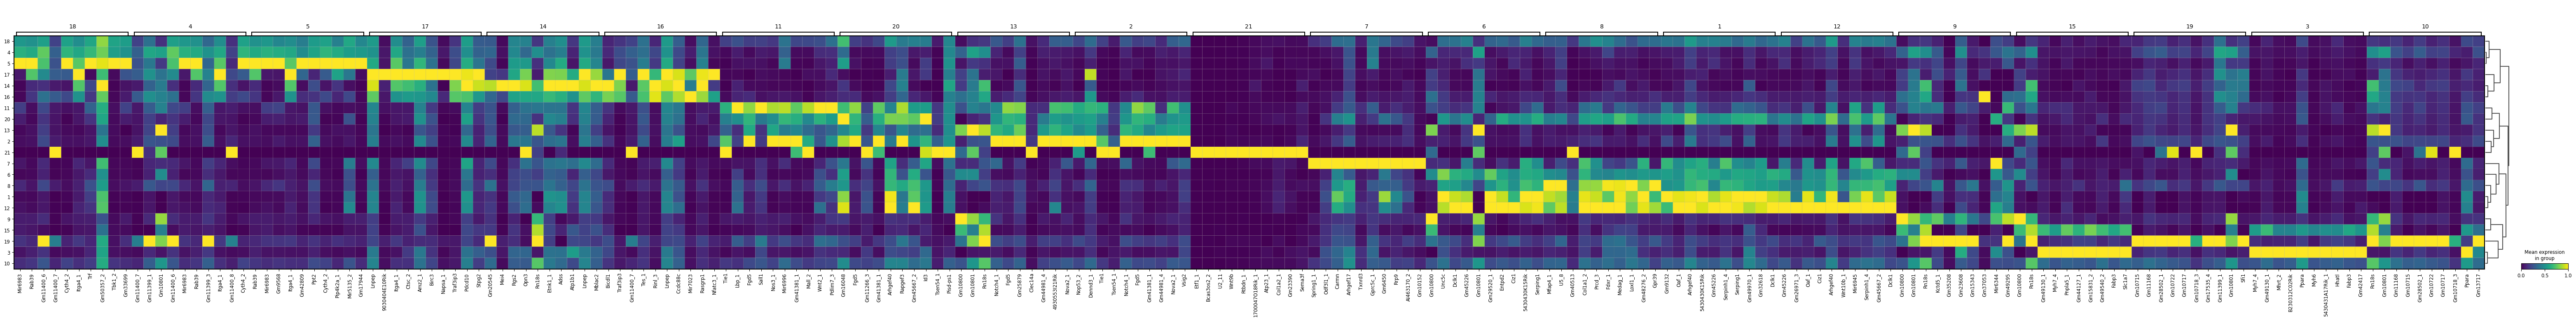

In [26]:
for res in resolutions:
    print(f'Plotting matrixplot for leiden with resolution: {res}')
    plot_key = 'rank_genes_groups_' + str(res)
    sc.pl.rank_genes_groups_matrixplot(genes_adata, standard_scale='var', n_genes=10, key=plot_key, show=False)
    # TODO
    # if save_figs:
    #    plt.savefig(f'{OUTPUT_FIGS}/ranked_genes_groups_matrixplot_leiden_{res}.png')
    plt.show()

In [27]:
for res in resolutions:
    ctannot.annot_ct(adata=adata, genes_adata=genes_adata, output_path=tree.annotation_dir, db_path=f"{PANGLAO_DB_PATH}", cluster_path=None, cluster_column=f"leiden_{res}", rank_genes_column=f"rank_genes_groups_{res}", sample=tree.run, ct_column=f"cell_types_{res}", tissue="all", db="panglao", inplace=True, species='Mm')

Output folder: /mnt/workspace/jdetlef/ext_ana/processed/all/annotation/leiden_0.1/ 
DB file: /mnt/workspace/jdetlef/sc-atac-framework/ctannot/panglao_markers 
Cluster folder: /mnt/workspace/jdetlef/ext_ana/processed/all/annotation/ranked/clusters/leiden_0.1/ 
Tissue: all 
DB: panglao
Created folder: /mnt/workspace/jdetlef/ext_ana/processed/all/annotation/ranked/clusters/leiden_0.1
Created folder: /mnt/workspace/jdetlef/ext_ana/processed/all/annotation/ranked/output/leiden_0.1
Writing one file per cluster containing gene names and ranked gene scores.
Starting cell type annotation.
Adding information to the adata object.
Finished cell type annotation! The results are found in the .obs table cell_types_0.1.
Output folder: /mnt/workspace/jdetlef/ext_ana/processed/all/annotation/leiden_0.2/ 
DB file: /mnt/workspace/jdetlef/sc-atac-framework/ctannot/panglao_markers 
Cluster folder: /mnt/workspace/jdetlef/ext_ana/processed/all/annotation/ranked/clusters/leiden_0.2/ 
Tissue: all 
DB: panglao
C

In [28]:
adata.obs

chr1_reads  chr10_reads  chr11_reads  chr12_reads  \
barcode                                                                       
CCATGATGAATCTGTG-sample1        5930         5367          657         2109   
TGTTATCACGCTAGAG-sample1        4786         4055         3375         4053   
GAACTACTGTATTGCG-sample1        1564          612         2039         2309   
TACCGACCTCGAACGA-sample1        4176         3330         2550         2547   
TGAATGGCTTAGGAGC-sample1        1981         1118          899          627   
...                              ...          ...          ...          ...   
GACCTATGACCACTTC-sample8          20          178         1007          102   
AGGTATGCTATTAAGG-sample8         113         1585          256           76   
AGTAAGTGAAGCGCTC-sample8         276           70          523          136   
GCGTCGATGTGTCACA-sample8          52           32         1709         3924   
GTCGGCTGAGTCCCGA-sample8          20           16          529           14   

                          chr13_reads  chr14_reads  chr15_reads  chr16_reads  \
barcode                                                                        
CCATGATGAATCTGTG-sample1        14960         3999        15397         6899   
TGTTATCACGCTAGAG-sample1         3294         3010         3192         2737   
GAACTACTGTATTGCG-sample1         1834         2987         1444          907   
TACCGACCTCGAACGA-sample1         2076         2622         1893         2194   
TGAATGGCTTAGGAGC-sample1          885          971         1104          850   
...                               ...          ...          ...          ...   
GACCTATGACCACTTC-sample8          504          359          940          337   
AGGTATGCTATTAAGG-sample8         3062          390         1818          588   
AGTAAGTGAAGCGCTC-sample8          468          446          202           60   
GCGTCGATGTGTCACA-sample8         2324         2026           18         1344   
GTCGGCTGAGTCCCGA-sample8          221          154          427          336   

                          chr17_reads  chr18_reads  ...  clustering  \
barcode                                             ...               
CCATGATGAATCTGTG-sample1         4282         6064  ...           1   
TGTTATCACGCTAGAG-sample1         3509         2867  ...           4   
GAACTACTGTATTGCG-sample1         1517         1515  ...           2   
TACCGACCTCGAACGA-sample1         1571         1546  ...           4   
TGAATGGCTTAGGAGC-sample1          830          525  ...           6   
...                               ...          ...  ...         ...   
GACCTATGACCACTTC-sample8          566          662  ...           2   
AGGTATGCTATTAAGG-sample8         2550          606  ...           3   
AGTAAGTGAAGCGCTC-sample8           34          453  ...           2   
GCGTCGATGTGTCACA-sample8         2029         1563  ...           4   
GTCGGCTGAGTCCCGA-sample8          472          438  ...           2   

                             cell_types_0.1     cell_types_0.2  \
barcode                                                          
CCATGATGAATCTGTG-sample1        Fibroblasts  Endothelial cells   
TGTTATCACGCTAGAG-sample1        Macrophages        Macrophages   
GAACTACTGTATTGCG-sample1     Cardiomyocytes     Myofibroblasts   
TACCGACCTCGAACGA-sample1        Macrophages        Macrophages   
TGAATGGCTTAGGAGC-sample1            B cells            B cells   
...                                     ...                ...   
GACCTATGACCACTTC-sample8     Cardiomyocytes     Cardiomyocytes   
AGGTATGCTATTAAGG-sample8  Endothelial cells  Endothelial cells   
AGTAAGTGAAGCGCTC-sample8     Cardiomyocytes     Myofibroblasts   
GCGTCGATGTGTCACA-sample8        Macrophages        Macrophages   
GTCGGCTGAGTCCCGA-sample8     Cardiomyocytes     Cardiomyocytes   

                             cell_types_0.3     cell_types_0.4  \
barcode                                                          
CCATGATGAATCTGTG-sample1        Fibroblast

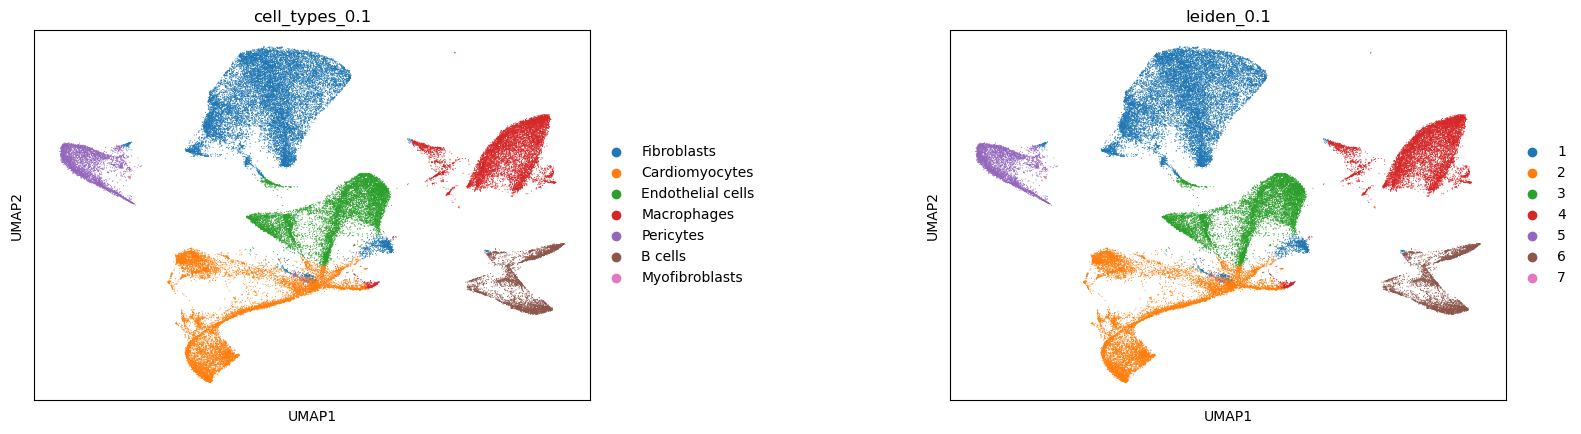

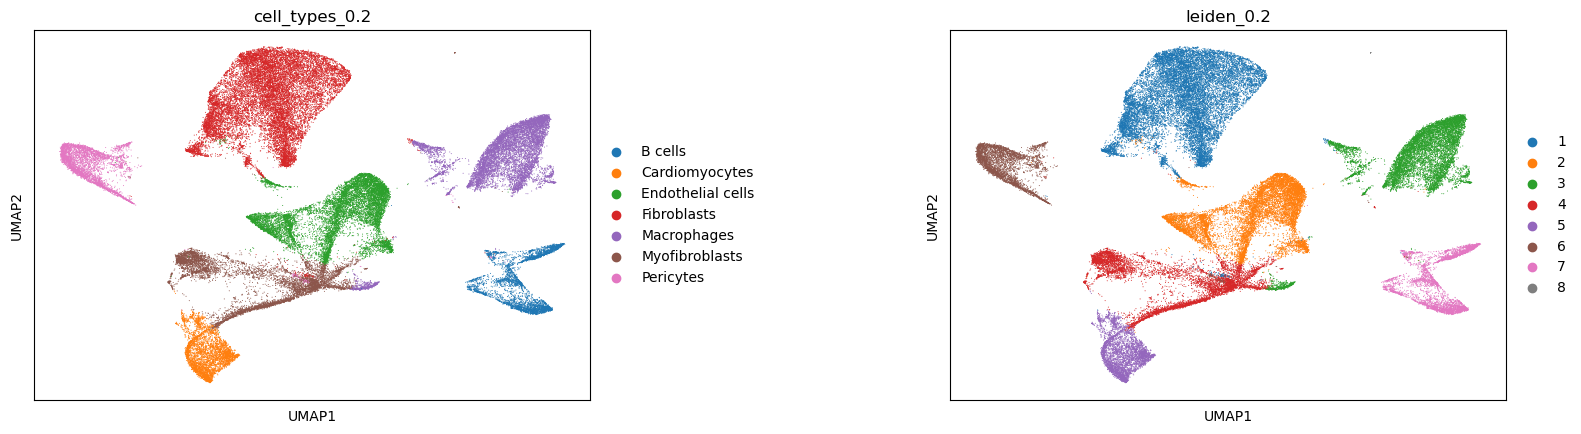

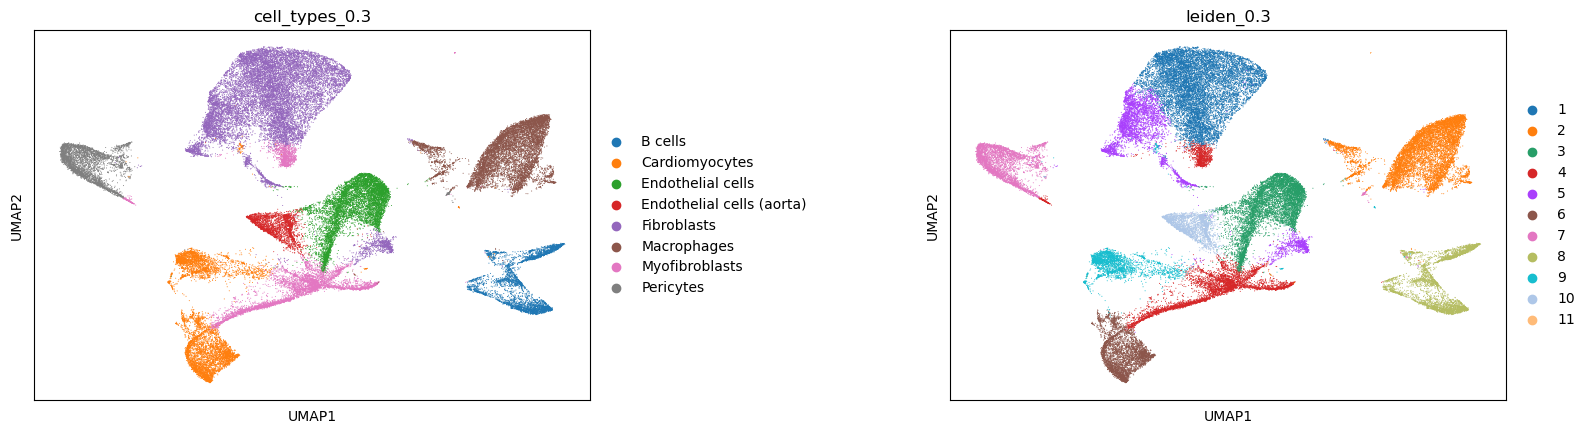

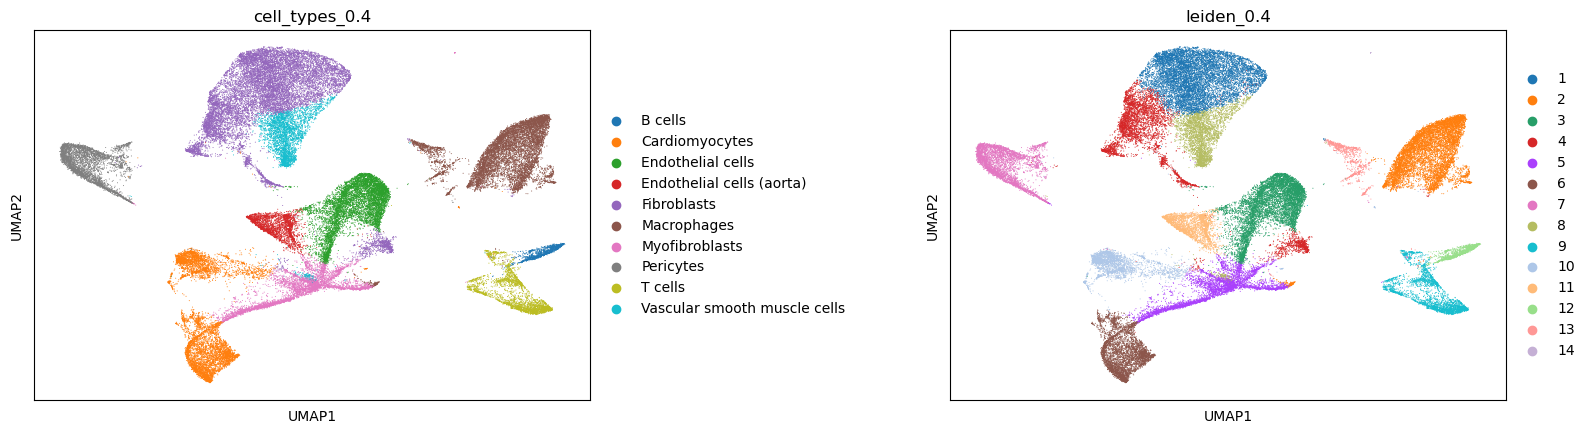

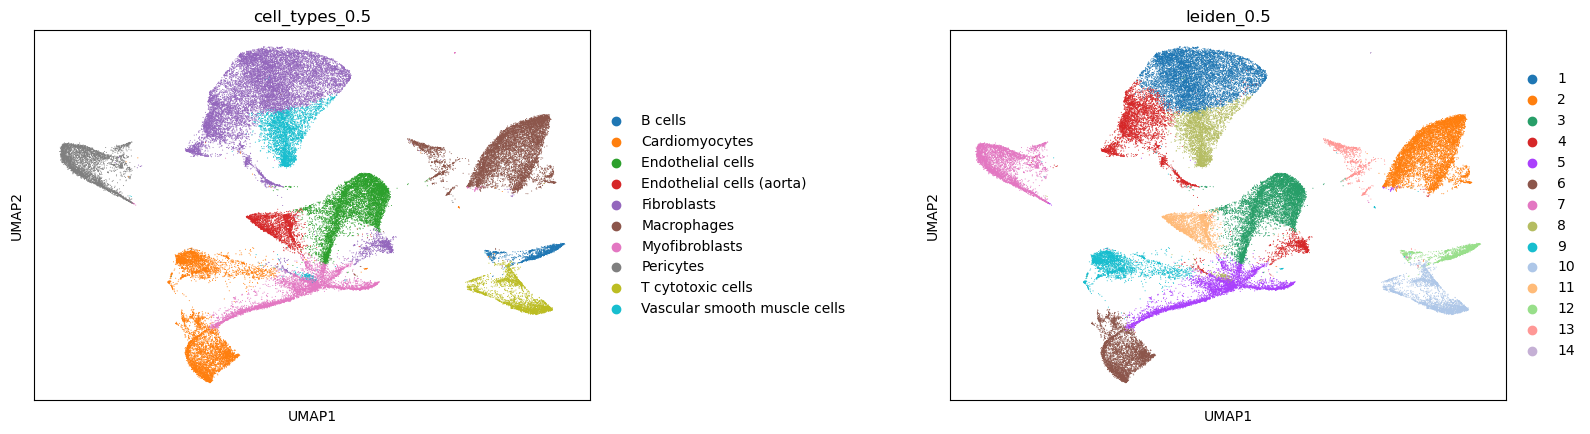

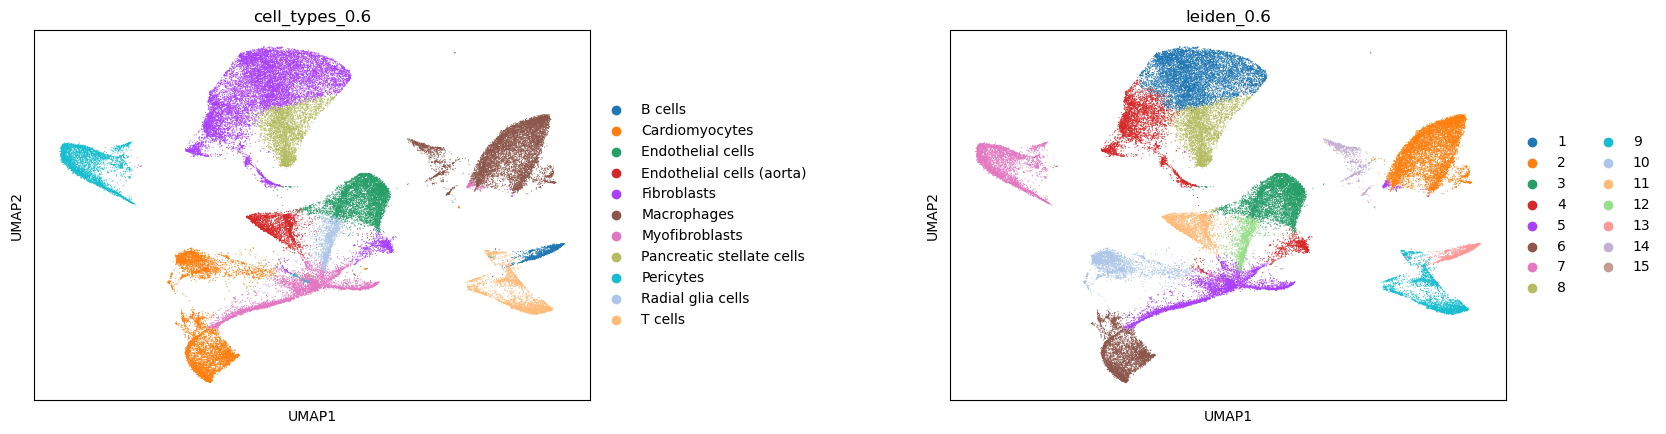

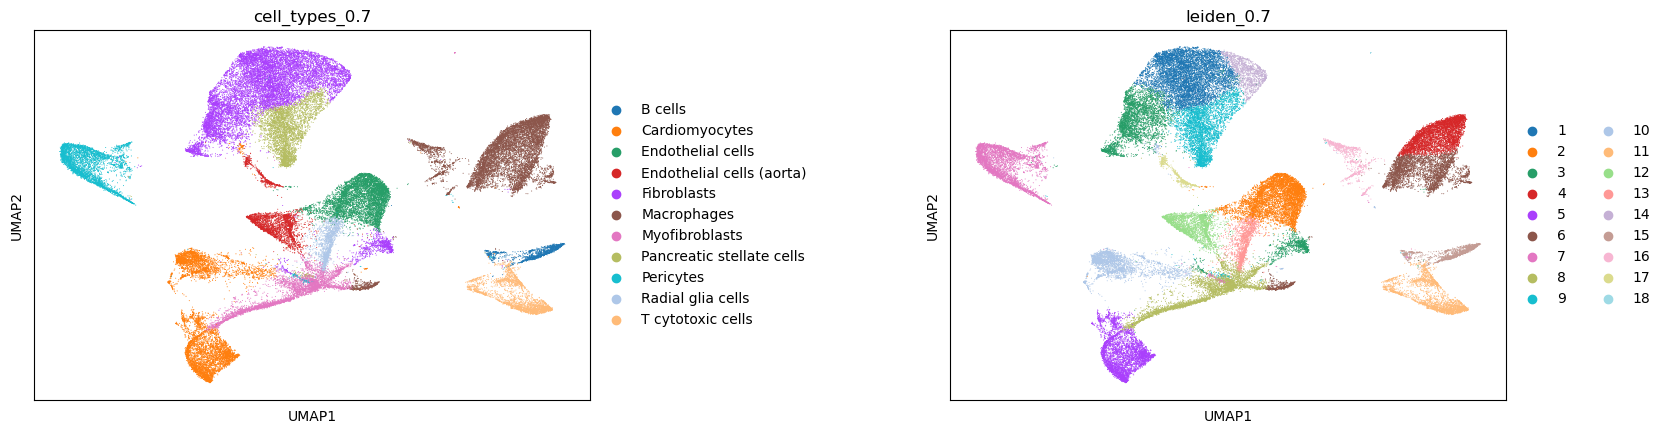

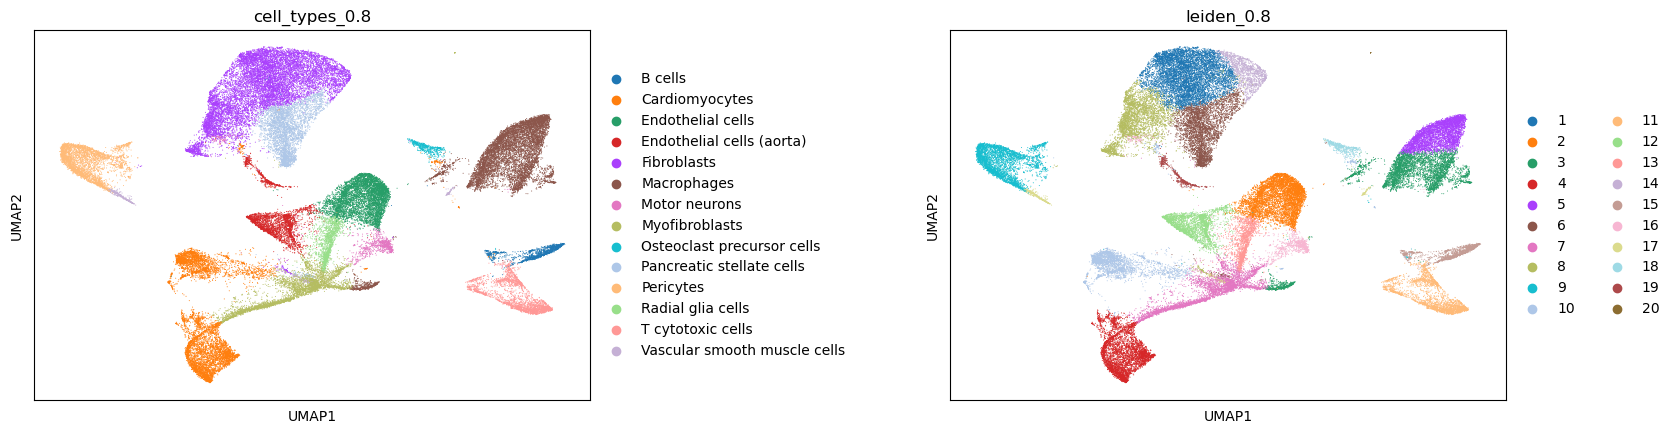

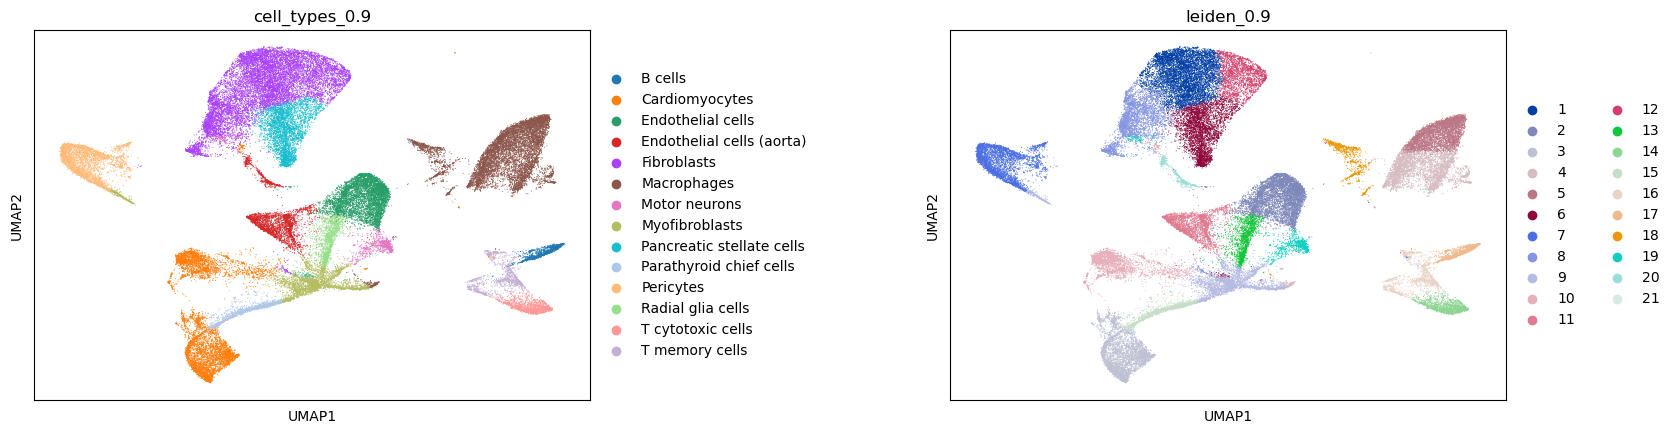

In [29]:
for res in resolutions:
    sc.pl.umap(adata, color=[f'cell_types_{res}', f'leiden_{res}'], wspace=0.5)

In [30]:
ctannot.show_tables(annotation_dir=tree.annotation_dir, resolution=0.1, clustering_column="leiden")

Cluster 1: Cell type  Score  Hits  Number of marker genes  Mean of UI
0                Fibroblasts   1348   167                     553           8
1  Pancreatic stellate cells    660    27                      67           5
2          Trophoblast cells    635    25                      78          17
3    Peritubular myoid cells    599    23                      63          10
4                  Podocytes    492    91                     338          10
5    Kidney progenitor cells    474     7                      15          18
6                  Pericytes    472    62                     203           9
7           Purkinje neurons    416    53                     165           9
8     Hepatic stellate cells    411    40                     149           8
9                 Beta cells    411    38                     157          13

Cluster 4: Cell type  Score  Hits  Number of marker genes  Mean of UI
0                 Macrophages   1464   132                     495           8
1        Red pulp macrophages   1177    11                      49          12
2               Kupffer cells    962    35                     127          13
3            Langerhans cells    941    11                      71          14
4                   Microglia    936    71                     259           7
5                     B cells    825    86                     322          10
6                 Neutrophils    822    56                     235          10
7  Osteoclast precursor cells    801     8                      37          18
8                   Monocytes    764    82                     343           8
9                 Eosinophils    747    18                      96          17

Cluster 2: Cell type  Score  Hits  Number of marker genes  Mean of UI
0        Cardiomyocytes   2627    96                     314          15
1              Myocytes    874    80                     269          16
2             Ionocytes    288     9                      38          22
3  Taste receptor cells    268    16                      53          21
4         Motor neurons    240    13                      39          22
5          Glomus cells    220    28                      99          11
6   Distal tubule cells    198    33                     129          16
7    Adrenergic neurons    152     6                      19          17
8   Smooth muscle cells    142    73                     255          10
9         Reticulocytes    142     8                      28          13

Cluster 6: Cell type  Score  Hits  Number of marker genes  \
0                       B cells    881    86                     322   
1                T memory cells    615    54                     198   
2                 B cells naive    543    44                     170   
3                B cells memory    488    45                     172   
4                       T cells    471    78                     299   
5             T cytotoxic cells    393     6                      20   
6  Plasmacytoid dendritic cells    366    45                     207   
7        Natural killer T cells    307    23                     109   
8                      NK cells    302    61                     270   
9                    Thymocytes    276    18                      55   

   Mean of UI  
0          10  
1           6  
2          11  
3          12  
4           8  
5           9  
6          12  
7          12  
8          12  
9          11

Cluster 3: Cell type  Score  Hits  Number of marker genes  Mean of UI
0          Endothelial cells   1699   175                     600           9
1  Endothelial cells (aorta)   1097    86                     280          11
2                Clara cells    400    14                      85          17
3   Hematopoietic stem cells    315    75                     290           8
4              Erythroblasts    226    21                      94           7
5    Kidney progenitor cells    162     7                      15          18
6         Adrenergic neurons    153     6                      19          17
7                 Osteocytes    136     5                      18          13
8   Retinal progenitor cells    126    13                      37          10
9            Granulosa cells    121    12                      64           9

Cluster 5: Cell type  Score  Hits  Number of marker genes  \
0                     Pericytes    496    62                     203   
1  Vascular smooth muscle cells    284     6                      19   
2        Hepatic stellate cells    264    40                     149   
3               Mesangial cells    174    54                     205   
4        Enterochromaffin cells    142     7                      51   
5     Pancreatic stellate cells    131    27                      67   
6      Retinal progenitor cells     87    13                      37   
7                  Hepatoblasts     44    14                      71   
8               Granulosa cells     34    12                      64   
9       Peritubular myoid cells     28    23                      63   

   Mean of UI  
0           9  
1          10  
2           8  
3           7  
4          20  
5           5  
6          10  
7           9  
8           9  
9          10

Cluster 7: Cell type  Score  Hits  Number of marker genes  Mean of UI
0           Myofibroblasts   -864     9                      32           6
1  Parathyroid chief cells   -896     7                      26          15
2        Radial glia cells   -897    11                      45           8
3               Osteocytes   -960     5                      18          13
4      Cholinergic neurons   -965     6                      20          14
5    Glutaminergic neurons  -1008     9                      28          10
6              Spermatozoa  -1019     7                      27          12
7           Foveolar cells  -1022    10                      71          12
8    Noradrenergic neurons  -1210     5                      20          16
9                 Nuocytes  -1246    12                      47           9

## Modify wrong cluster annotations by selecting other recommendations

In [32]:
change_annotation = input('Do you want to change the annotation? answer with yes or no:')

Do you want to change the annotation: no


In [35]:
if change_annotation == 'yes':
    ctannot.modify_ct(adata=adata, resolutions=resolutions, annotation_dir=tree.annotation_dir, clustering_column="leiden", cell_type_column="cell_types", inplace=True)

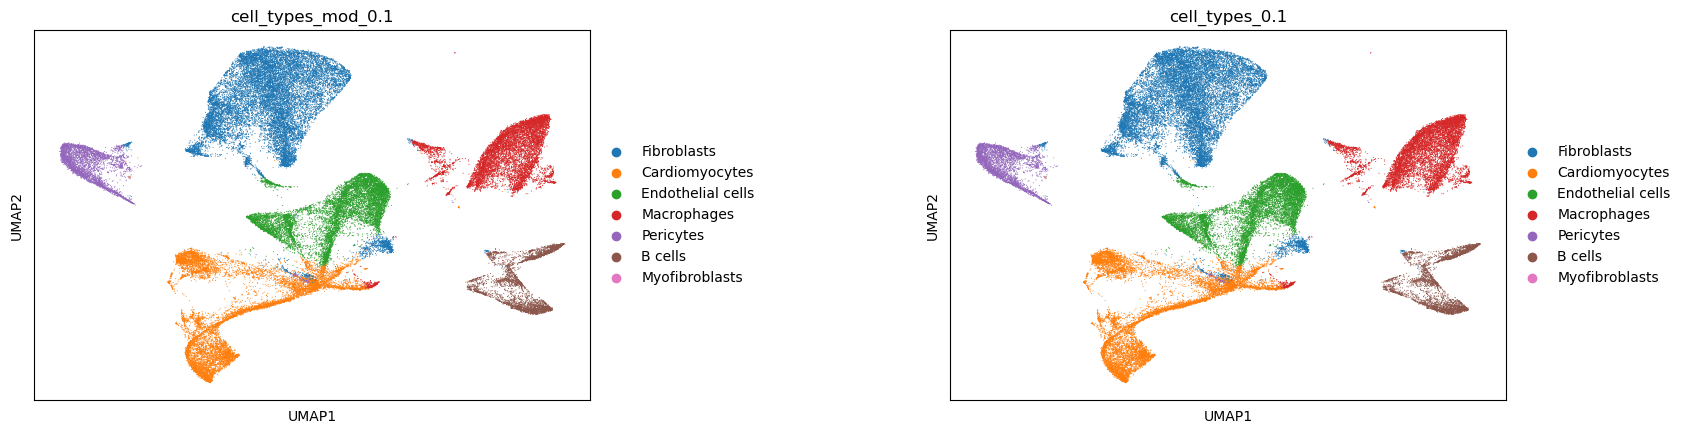

In [36]:
sc.pl.umap(adata, color=[f'cell_types_mod_0.1', f'cell_types_0.1'], wspace=0.5)

In [38]:
adata_output = tree.annotation_anndata
adata.write(filename=adata_output)

In [39]:
import os
import shutil
repo_path = os.getcwd()
notebook_name = '5_annotation.ipynb'
notebook_path = os.path.join(repo_path, notebook_name)
notebook_copy = os.path.join(tree.annotation_dir , notebook_name)
shutil.copyfile(notebook_path, notebook_copy)

'/mnt/workspace/jdetlef/ext_ana/processed/all/annotation/5_annotation.ipynb'